In [2]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [3]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from numpy.linalg import inv

## Import modules from parent and multimode expts

In [4]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
data_parent_path = r'h:\Shared drives\SLab\Multimode\experiment\250113'
print("Data Parent Path:", data_parent_path)
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Data Parent Path: h:\Shared drives\SLab\Multimode\experiment\250113
Parent Path: c:\_Lib\python\multimode_expts


In [5]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [6]:
from fitting.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [7]:
import experiments.fitting as fitter
from numpy.linalg import inv

# config

In [8]:
curr_path = os.getcwd()
config_file = expts_path+'\\config_rfsoc_ziqian.yml'
config_path = config_file
print('Config will be', config_path)


Config will be C:\_Lib\python\multimode_expts\config_rfsoc_ziqian.yml


In [9]:
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

# Exp path

In [10]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
# data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent_path+'\\data'
print('Data are extracted from', expt_path)

Data are extracted from h:\Shared drives\SLab\Multimode\experiment\250113\data


In [168]:
from experiments.dataset import *
from experiments.dataset import storage_man_swap_dataset
import os 

file_path = os.path.join(expts_path, 'man1_storage_swap_dataset.csv')
# print(os.makedirs(file_path, exist_ok=True))
ds = storage_man_swap_dataset(file_path)

# Coupler Echo


In [3]:
# at sweet spot -0.2 ma
t1 = 49.238799932709604
t2 = 48.30790330377584
t2_echo = (-0.5/t1 + 1/t2)**-1
print(t2_echo)

94.82310434230719


# Coupler Induced dispersive shift 

## Parity Experiment with M1

Decay from avgi [us] 90.63165974939687
Pi length from avgi data [us]: 1.4338571581438915
	Pi/2 length from avgi data [us]: 0.7169285790719457

Decay from avgq [us] 306.3963068185854
Pi length from avgq data [us]: 1.4319156569252882
Pi/2 length from avgq data [us]: 0.7159578284626441


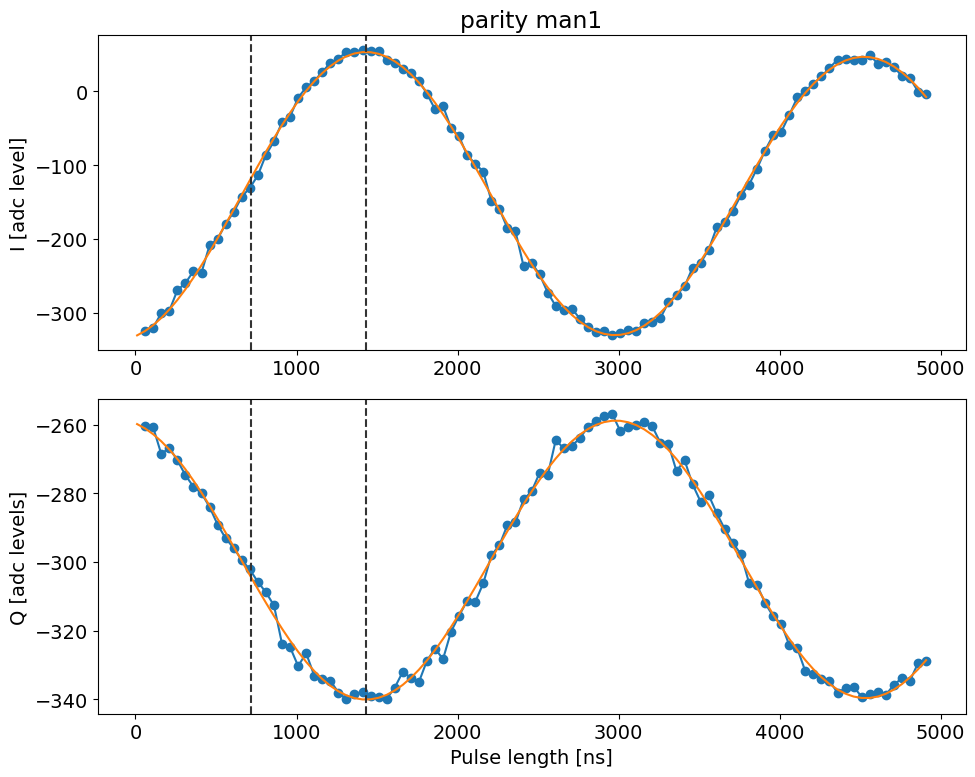

In [74]:
temp_data, attrs = prev_data(expt_path, '00001_ParityDelayExperiment.h5')
parity_mapping_display(temp_data, fit=True, fitparams=None, #[400, 0.08, None, None, -200, 90],
                       title='parity man1')

### Parity Measurement (without coupler excited)

Found peak in amps at [MHz] 4983.730498078224, HWHM 1.8198428129850943
Found peak in I at [MHz] 4983.707741972012, HWHM 1.7709535137080226
Found peak in Q at [MHz] 4983.616421869831, HWHM 1.8821395932519798


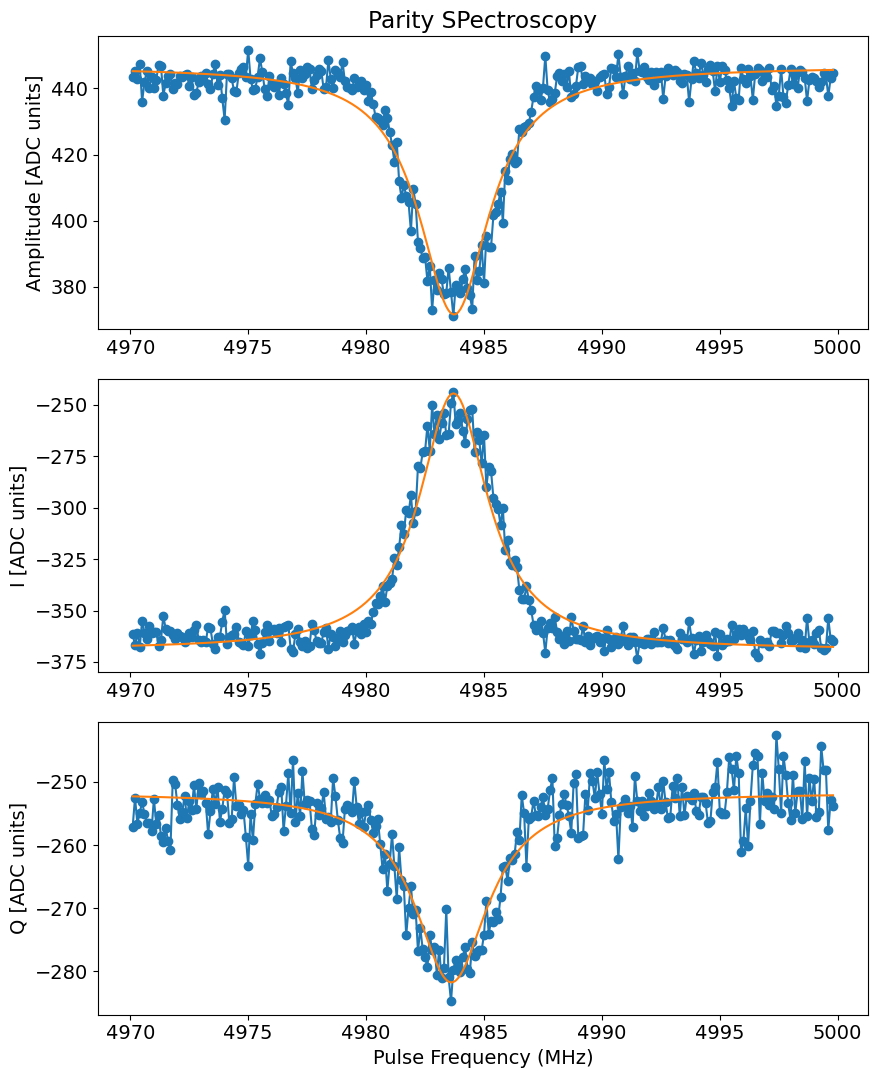

In [80]:
temp_data, attrs = prev_data(expt_path, '00002_ParityFreqExperiment.h5')
spectroscopy_display(temp_data, fit=True, signs=[1,1,1], hlines=None, vlines=None,  title='Parity SPectroscopy')

#### coupler excited

Found peak in amps at [MHz] 4982.278228520695, HWHM -1.3245572952216158
Found peak in I at [MHz] 4982.280978907773, HWHM 1.346805180667584
Found peak in Q at [MHz] 4982.258661427829, HWHM -1.5580627612427738


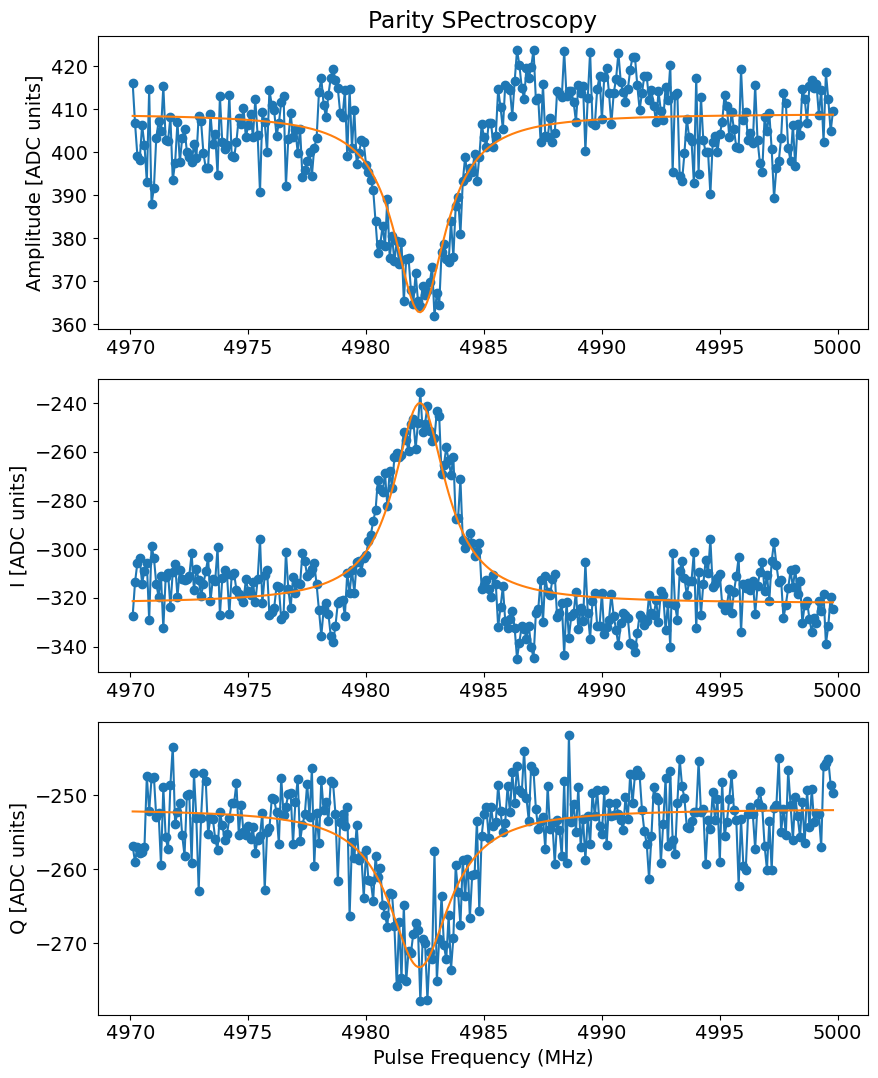

In [79]:
temp_data, attrs = prev_data(expt_path, '00003_ParityFreqExperiment.h5')
spectroscopy_display(temp_data, fit=True, signs=[1,1,1], hlines=None, vlines=None,  title='Parity SPectroscopy')

Found peak in amps at [MHz] 4983.730498078224, HWHM 1.8198428129850943
Found peak in I at [MHz] 4983.707741972012, HWHM 1.7709535137080226
Found peak in Q at [MHz] 4983.616421869831, HWHM 1.8821395932519798
Found peak in amps at [MHz] 4982.278228520695, HWHM -1.3245572952216158
Found peak in I at [MHz] 4982.280978907773, HWHM 1.346805180667584
Found peak in Q at [MHz] 4982.258661427829, HWHM -1.5580627612427738


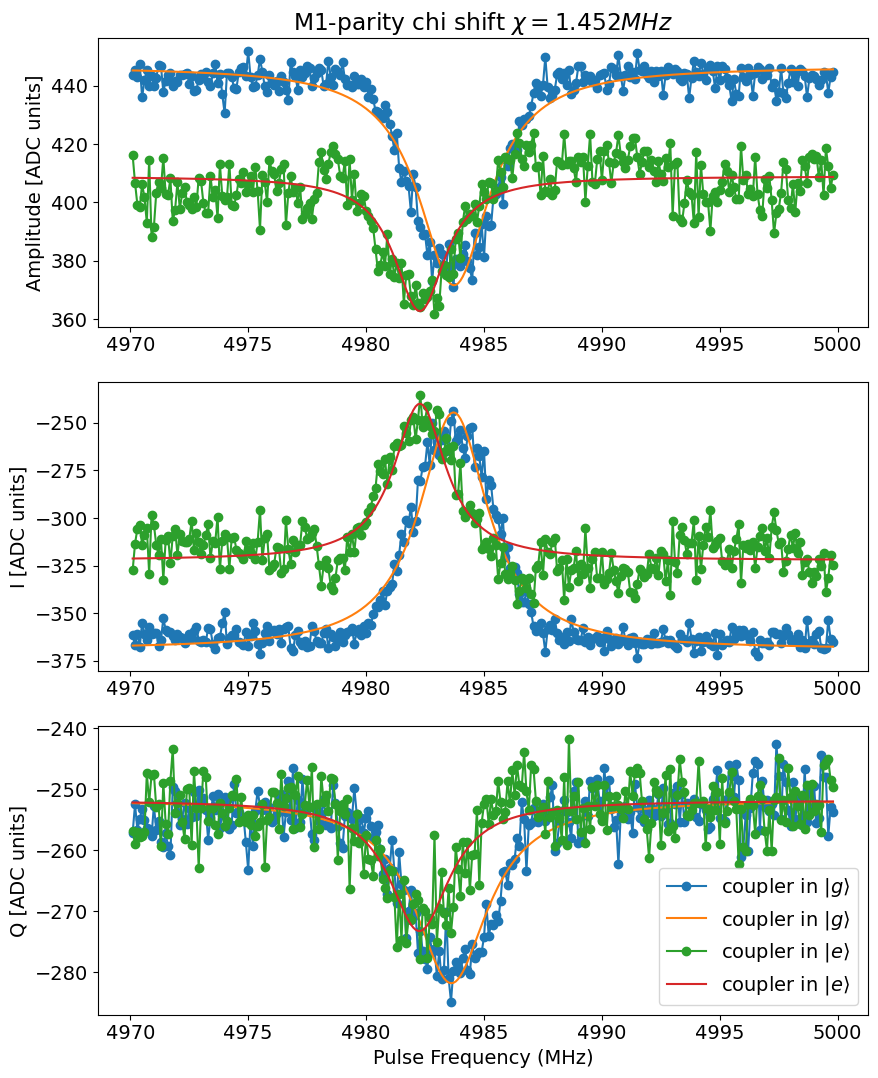

In [100]:
temp_data2, attrs = prev_data(expt_path, '00002_ParityFreqExperiment.h5')
temp_data3, attrs = prev_data(expt_path, '00003_ParityFreqExperiment.h5')
labels = [r'coupler in $|g\rangle$', r'coupler in $|e\rangle$']
multiple_specs([temp_data2, temp_data3], labels, fit=True, signs=[1,1,1], hlines=None, vlines=None, title='M1-parity chi shift $\chi = 1.452 MHz $')
# 4983.730498078224-4982.278228520695 = 1.452269557529


Found peak in amps at [MHz] 4983.656217367532, HWHM 1.9090916767127377
Found peak in I at [MHz] 4983.670856852892, HWHM 1.829468435075113
Found peak in Q at [MHz] 4983.736420324157, HWHM 1.8374187789532122


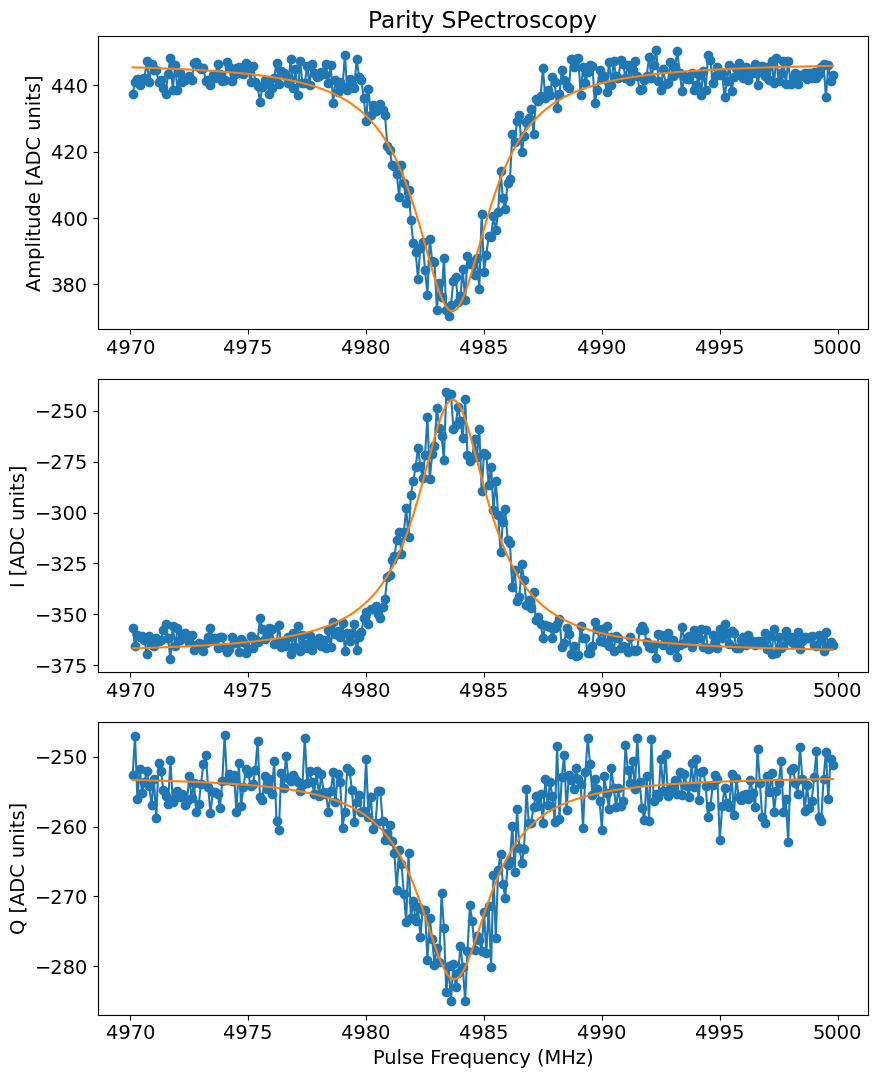

In [76]:
temp_data, attrs = prev_data(expt_path, '00001_ParityFreqExperiment.h5')
spectroscopy_display(temp_data, fit=True, signs=[1,1,1], hlines=None, vlines=None,  title='Parity SPectroscopy')

In [77]:
attrs['config']['expt']

{'start': 4970,
 'stop': 5000,
 'step': 0.1,
 'reps': 500,
 'rounds': 1,
 'qubit': 0,
 'normalize': False,
 'single_shot': False,
 'singleshot_reps': 10000,
 'span': 20,
 'prep_e': False,
 'manipulate': 1,
 'displace': [True, 0.1, 1000],
 'const_pulse': [False, 1],
 'f0g1_cavity': 0,
 'prepulse': False,
 'pre_sweep_pulse': [[3568.472846079858,
   3425.284338249488,
   2007.54,
   973.23,
   3568.472846079858,
   3425.284338249488,
   2008.78],
  [10964, 9530, 15000, 1000, 10964, 9530, 15000],
  [0, 0, 0.6164057205175526, 0.2511274014927775, 0, 0, 0.6179152963739796],
  [0, 0, 0, 0, 0, 0, 0],
  [2, 2, 0, 1, 2, 2, 0],
  ['g', 'g', 'flat_top', 'flat_top', 'g', 'g', 'flat_top'],
  [0.035, 0.035, 0.005, 0.005, 0.035, 0.035, 0.005]],
 'cav_freq': 4999.900000000109}

## Storage Sidebands with coupler excited

In [80]:
ds.df

NameError: name 'ds' is not defined

In [162]:
chi_shifted_sidebands = np.array([350.69, 522.27, 698.23, 878.09, 1055.6, 1246.97,  1424.44])
original_sidebands =   np.array(
                     [349.66, 521.23, 696.98, 876.38, 1053.95, 1245.5249999999999,
 1423.2749999999999])
((chi_shifted_sidebands - original_sidebands) - 1.452)

array([-0.422, -0.412, -0.202,  0.258,  0.198, -0.007, -0.287])

In [78]:
0.3**2/400

0.000225

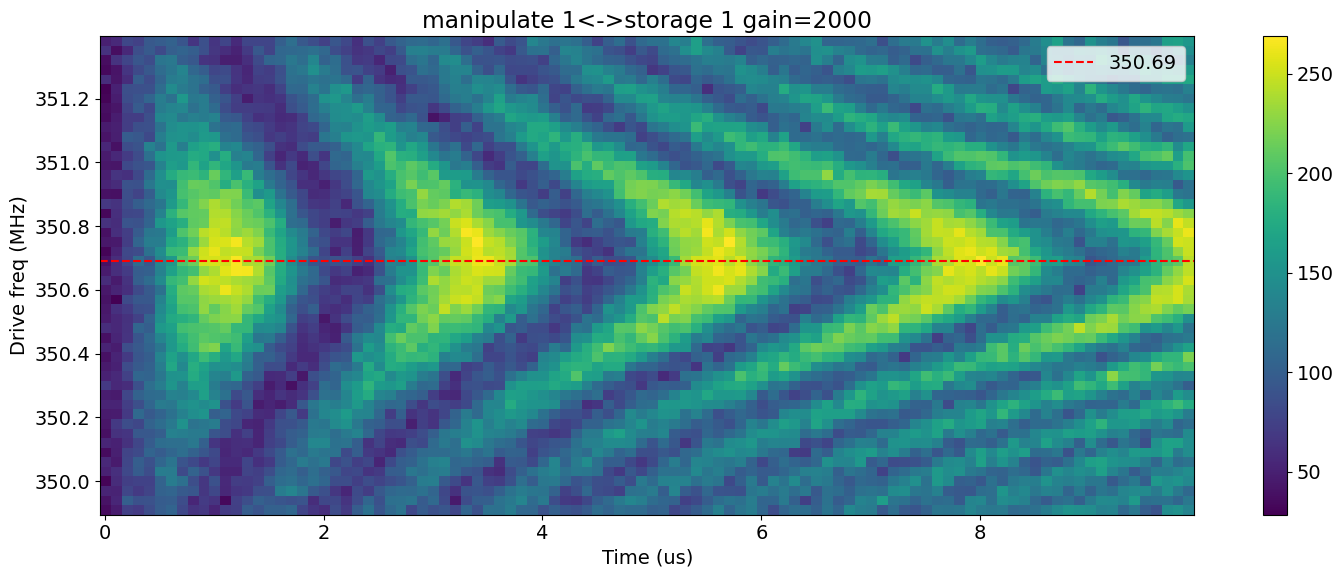

In [15]:
file_list = np.arange(779,829,1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[350.69], vlines=None, title="manipulate 1<->storage 1 gain=2000")
    

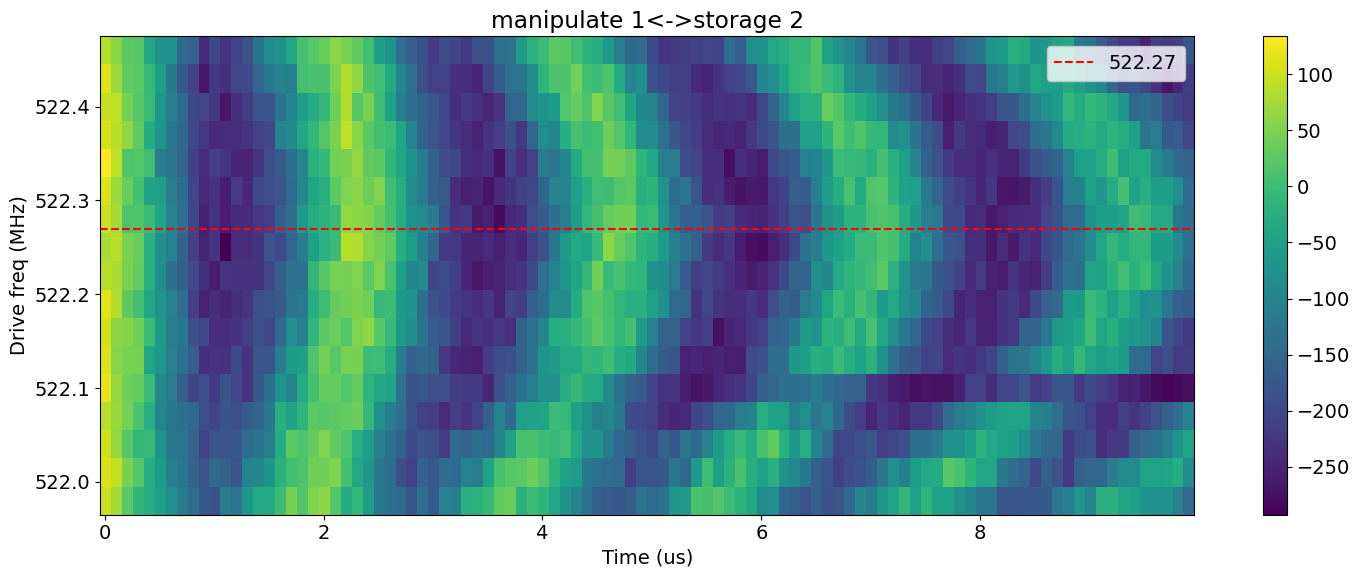

In [44]:
# file_list = np.arange(829, 879, 1)
# file_list = np.arange(362,372,1)
file_list = np.arange(951,968,1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[522.27], vlines=None, title="manipulate 1<->storage 2")
    

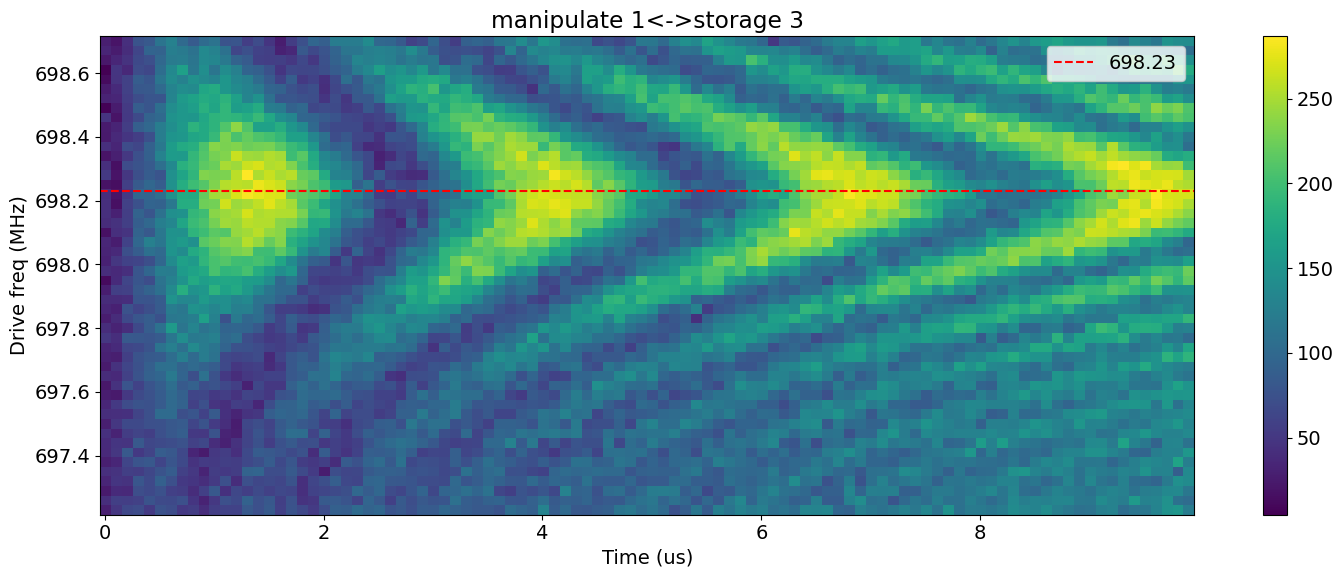

In [20]:

file_list = np.arange(879, 929, 1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[698.23], vlines=None, title="manipulate 1<->storage 3")

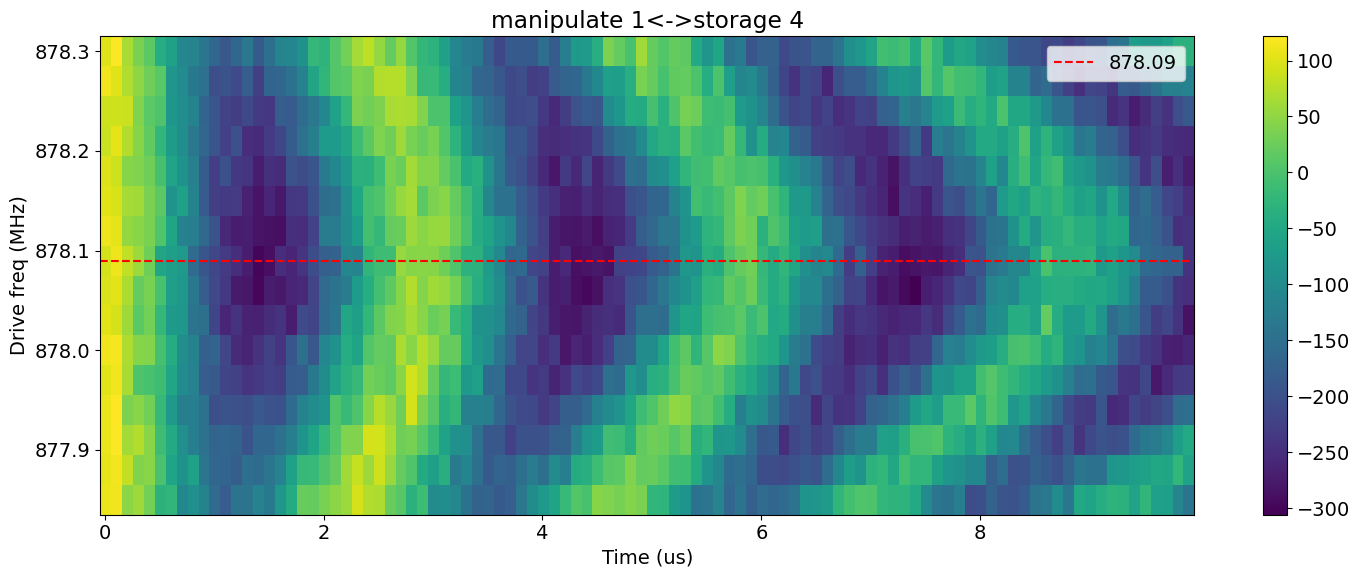

In [70]:

file_list = np.arange(968, 984, 1)
# file_list = np.arange(344,357, 1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[878.09], vlines=None, title="manipulate 1<->storage 4")

In [71]:
attrs['config']['expt']['flux_drive'][2]

9000

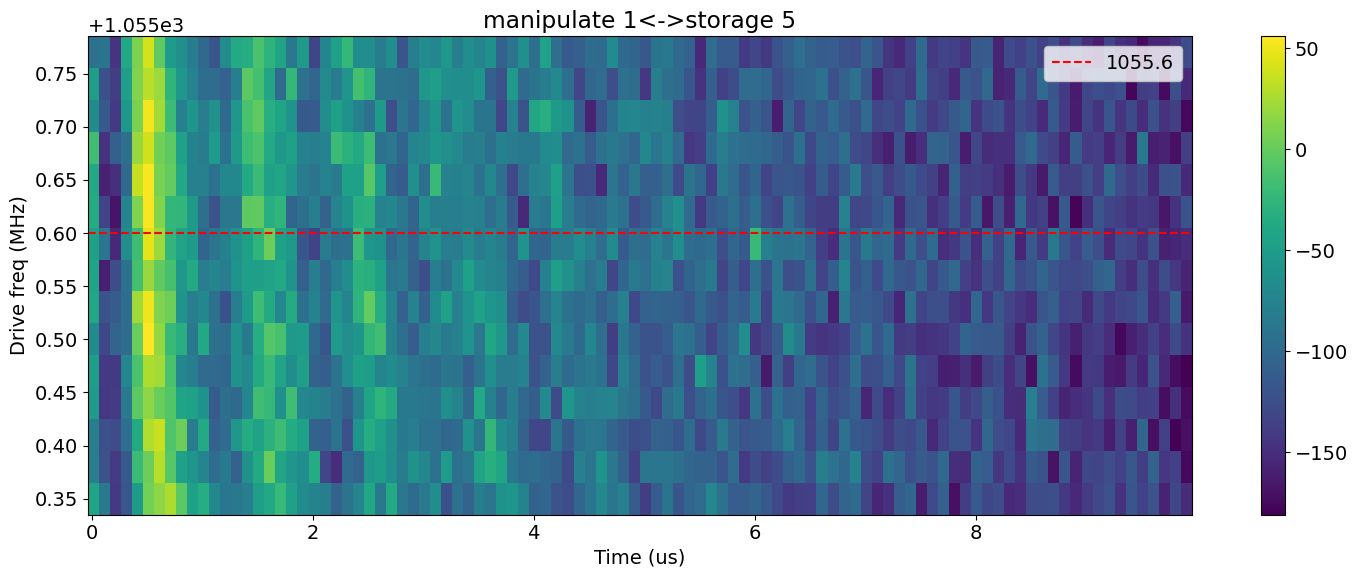

In [50]:
file_list = np.arange(391,411,1)
file_list = np.arange(985, 1000, 1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1055.6], vlines=None, title="manipulate 1<->storage 5")
    

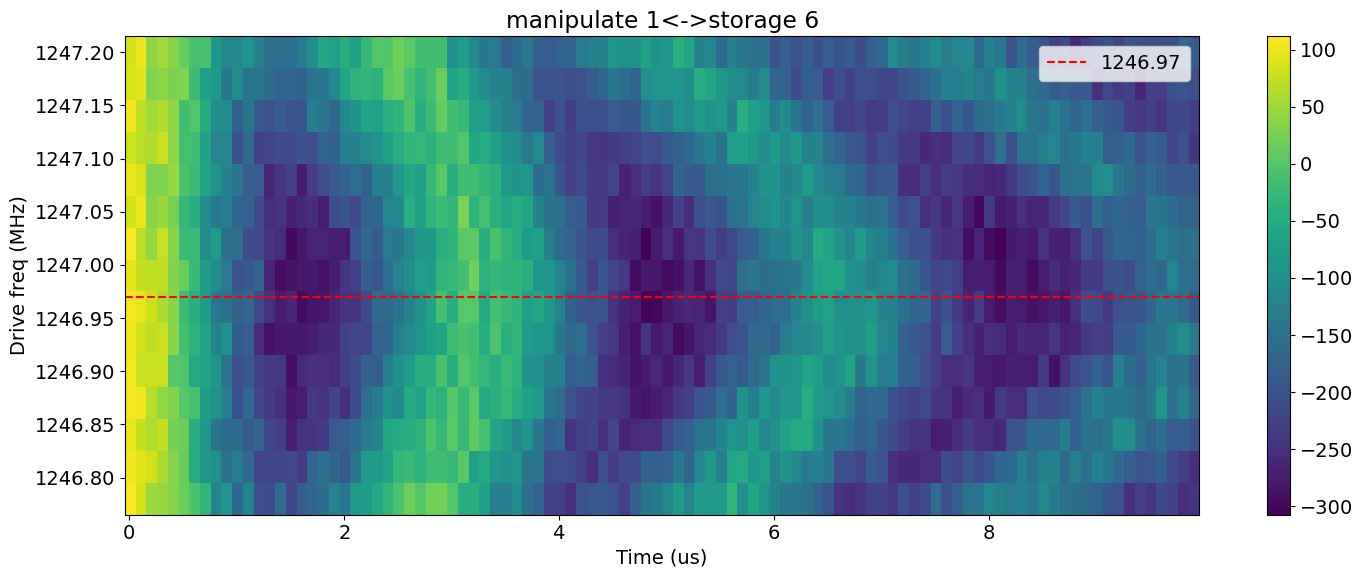

In [56]:
file_list = np.arange(411,435,1)
file_list = np.arange(1003, 1018, 1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1246.97], vlines=None, title="manipulate 1<->storage 6")
    

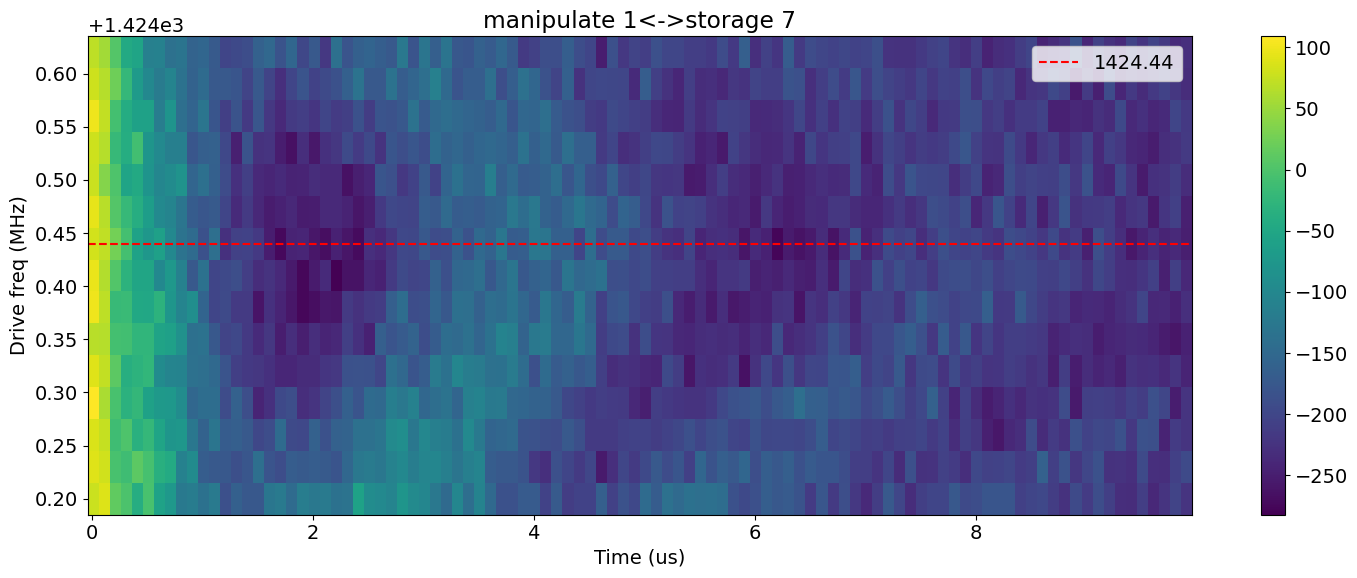

In [58]:
file_list = np.arange(436,456,1)
file_list = np.arange(1019, 1034, 1)
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1424.44], vlines=None, title="manipulate 1<->storage 7")

#### Probing S4...S7 at lower gains to accurately measure the sidebands

In [164]:
coup_excited = [878.11, 1056.22, 1246.23, 1424.4]
coup_ground = [876.72, 1053.43, 1244.97, 1423.18]
chi_shift = (np.array(coup_excited) - np.array(coup_ground) - 1.452)
print(chi_shift)

[-0.062  1.338 -0.192 -0.232]


In [169]:
ds.df

stor_name  freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1     349.660             0.03   0.942926    0.465943   
1      M1-S2     521.230             0.05   1.069160    0.531718   
2      M1-S3     696.980             0.03   1.256963    0.613370   
3      M1-S4     876.380             0.03   1.235632    0.622603   
4      M1-S5    1053.950             0.03   1.882097    0.985547   
5      M1-S6    1245.525             0.03   1.500950    0.732998   
6      M1-S7    1423.275             0.03   2.153588    1.085899   
7      M1-S8      -1.000            -1.00  -1.000000   -1.000000   
8      M1-S9      -1.000            -1.00  -1.000000   -1.000000   
9     M1-S10      -1.000            -1.00  -1.000000   -1.000000   
10    M1-S11      -1.000            -1.00  -1.000000   -1.000000   
11    M1-S12      -1.000            -1.00  -1.000000   -1.000000   
12        M1    2007.540             0.02   0.616406    0.304546   
13        M2    1834.840             0.01   1.046171    0.521769   
14     M2-S1     175.630             0.01   2.173484    1.086742   
15     M2-S2     346.840             0.01   0.908835    0.454417   
16     M2-S3     523.220             0.01   1.561615    0.780808   
17     M2-S4     702.650             0.01   1.386764    0.693382   
18     M2-S5     878.780             0.01   1.303372    0.651686   
19     M2-S6    1070.100             0.01   2.379622    1.189811   
20     M2-S7    1249.700             0.01   1.796981    0.898491   
21     M2-M1     173.790             0.01   0.463481    0.231741   
22     M1-D1    2313.440             0.01  10.000000    0.000000   
23     M2-D2    2094.050             0.01  15.000000    0.000000   
24      M1-C     973.230             0.02   0.251127    0.122354   
25     M1_ce    2008.780             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               3000  2025-01-21 16:12:51.119011  
1               5000  2025-01-21 16:17:17.763411  
2               9000  2025-01-21 16:17:39.113328  
3               9000  2025-01-21 16:17:54.523998  
4               7500  2025-01-21 16:18:31.141469  
5              13500  2025-01-21 16:32:20.759195  
6              10000  2025-01-21 16:32:02.177572  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12             15000  2025-01-20 06:45:27.220400  
13             15000  2024-11-28 12:07:48.539701  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              5000  2025-01-23 14:54:56.384507  
23              8000  2025-01-23 17:22:53.776061  
24              1000  2025-01-20 09:34:00.029234  
25             15000  2025-01-20 09:52:35.311227

$\text{zz-shift} =  \chi a^\dagger a (|e\rangle \langle e| - |g\rangle \langle g|) $

$\chi = -\frac{g^2 }{\Delta (\Delta - \alpha ) }\alpha$   

For S5m, use the following two equations to back out the $g$

$\omega_a(\Phi_{ext} = 0)= \bar{\omega_a} + 2\frac{g^2}{\Delta(\Phi_{ext}) (\Delta(\Phi_{ext}) - \alpha)}\alpha $

$\omega_a(\Phi_{ext} = 0.269 \pi)= \bar{\omega_a} + 2\frac{g^2}{\Delta(\Phi_{ext}) (\Delta(\Phi_{ext}) - \alpha)}\alpha $

where 
$\Delta(\Phi_{ext}) \approx \bar{\omega_a} -\omega_c(\Phi_{ext}) $

In [205]:
For S5 the $g$

$\omega_a(\Phi_{ext} = 0)= \bar{\omega_a} + 2\frac{g^2}{\Delta(\Phi_{ext}) (\Delta(\Phi_{ext}) - \alpha)}\alpha $

$\omega_a(\Phi_{ext} = 0.269 \pi)= \bar{\omega_a} + 2\frac{g^2}{\Delta(\Phi_{ext}) (\Delta(\Phi_{ext}) - \alpha)}\alpha $

where 
$\Delta(\Phi_{ext}) \approx \bar{\omega_a} -\omega_c(\Phi_{ext}) $

SyntaxError: invalid syntax (2672566875.py, line 1)

In [183]:
#for s5
upper_bound = 6.037895e3
lower_bound = 6.03712e3
omega_a_bar = lower_bound #(upper_bound + lower_bound)/2
alpha = 57

man_freq_zero_flux = 3568.1751638611518 + 3425.2997709216247 - 1977.70#2013.8
man_freq_current_flux = 3568.1751638611518 + 3425.2997709216247 - 2007.54
coup_freq_zero_flux = man_freq_zero_flux - 281
coup_freq_curent_flux = man_freq_current_flux - 973.230

detuning_zero_flux = omega_a_bar - coup_freq_zero_flux
detuning_current_flux = omega_a_bar - coup_freq_curent_flux

omega_a_zero_flux = upper_bound  
omega_a_current_flux = 6.03749e3 #man_freq_current_flux +1053.2

diff =  omega_a_zero_flux - omega_a_current_flux

g_sq_inv = (2/diff) *alpha* (1/(detuning_zero_flux * (detuning_zero_flux-alpha)) - 1/(detuning_current_flux * (detuning_current_flux-alpha)))
g_sq = 1/g_sq_inv

# g_sq = detuning_zero_flux * (detuning_current_flux - alpha)* (omega_a_zero_flux - omega_a_bar)/alpha /2

print(f'g = %0.3f Mhz', np.sqrt(g_sq))
print(f'zz= %0.3f Mhz', 2*alpha *g_sq/(detuning_current_flux*(detuning_current_flux - alpha)))

g = %0.3f Mhz 98.59006460035243
zz= %0.3f Mhz 0.2782118348633154


In [188]:
#final data 
zz_shifts = [-0.422, -0.412, -0.202] + chi_shift.tolist()
# create a satframe with mode, frequency, detuning , g, zz shift 
mode_labels = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']
man_freq =  4983.707741972012  
freqs = ds.df['freq (MHz)'][:7] +man_freq
coupler_freq = ds.df['freq (MHz)'][24] * -1 + man_freq
detunings = freqs-coupler_freq
anharmonicity = 57 # mhz 
gs = np.sqrt(np.array(np.abs(zz_shifts))/2 * detunings*(detunings-anharmonicity)/anharmonicity)

#manual entries 
gs[4] = 98.59006460035243
zz_shifts[4] = -0.2782118348633154

data = {'mode': mode_labels, 'freq': freqs, 'detuning': detunings, 'g': gs, 'zz_shift': zz_shifts}
df_chis = pd.DataFrame(data)
df_chis


mode         freq  detuning           g  zz_shift
0   S1  5333.367742  1322.890   78.734242 -0.422000
1   S2  5504.937742  1494.460   88.112234 -0.412000
2   S3  5680.687742  1670.210   69.096214 -0.202000
3   S4  5860.087742  1849.610   42.464539 -0.062000
4   S5  6037.657742  2027.180   98.590065 -0.278212
5   S6  6229.232742  2218.755   89.878559 -0.192000
6   S7  6406.982742  2396.505  106.817578 -0.232000

In [206]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'StorageCoupler_chis.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
df_chis.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\250113\RAM_paper_results\datasets\StorageCoupler_chis.csv


In [193]:
simulated_gs = [80.5661, 85.826, 81.6056, 71.560, 57.8491, 57.9471, 51.4388  ]

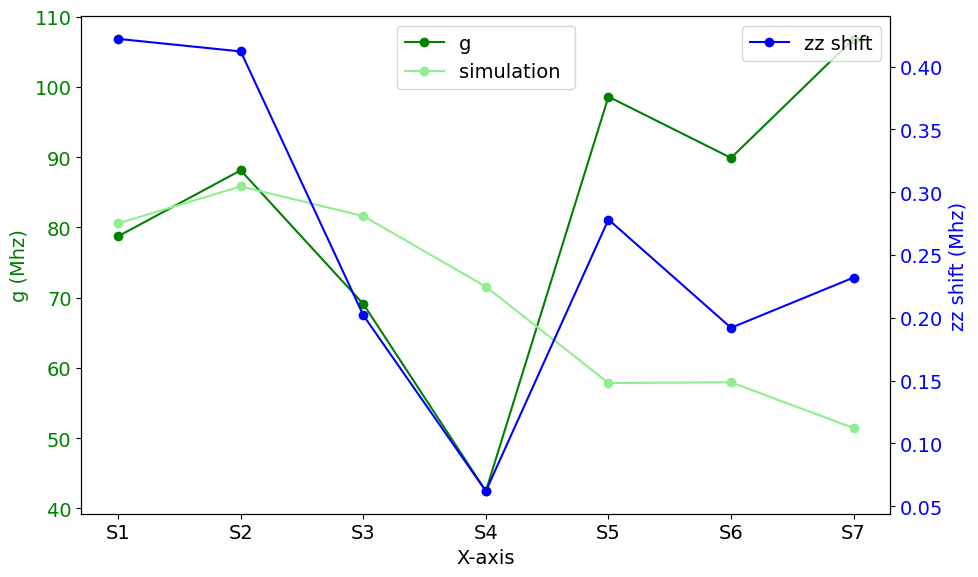

In [204]:
# Sample data (replace with actual data)
x = df_chis['mode']
g = df_chis['g']
zz_shift = np.abs(df_chis['zz_shift'])

fig, ax1 = plt.subplots()

# Plot g on the first y-axis
ax1.plot(x, g, '-o', color = 'green', label='g ')
ax1.plot(x, simulated_gs, '-o', color = 'lightgreen',label='simulation ')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('g (Mhz)', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(x, zz_shift, '-o', color = 'blue', label='zz shift')
ax2.set_ylabel('zz shift (Mhz)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Add legends
# ax1.legend(loc='bottom left')
# ax2.legend(loc='upper right')
ax1.legend(loc = 'upper center')
plt.legend()
plt.tight_layout()

In [190]:
gs

0     78.734242
1     88.112234
2     69.096214
3     42.464539
4     98.590065
5     89.878559
6    106.817578
Name: freq (MHz), dtype: float64

In [167]:
ds.df

NameError: name 'ds' is not defined

##### S4

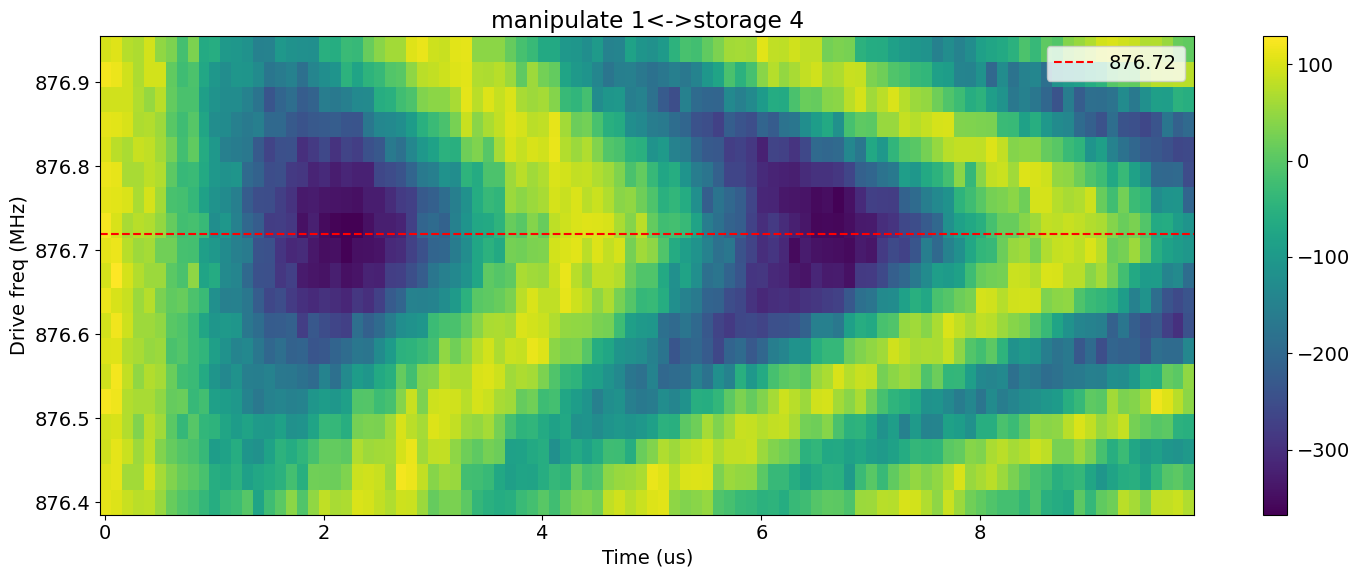

In [144]:
# with coupler ground
file_list = np.arange(1036, 1055, 1)
# file_list = np.arange(492,499, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[876.72], vlines=None, title="manipulate 1<->storage 4")

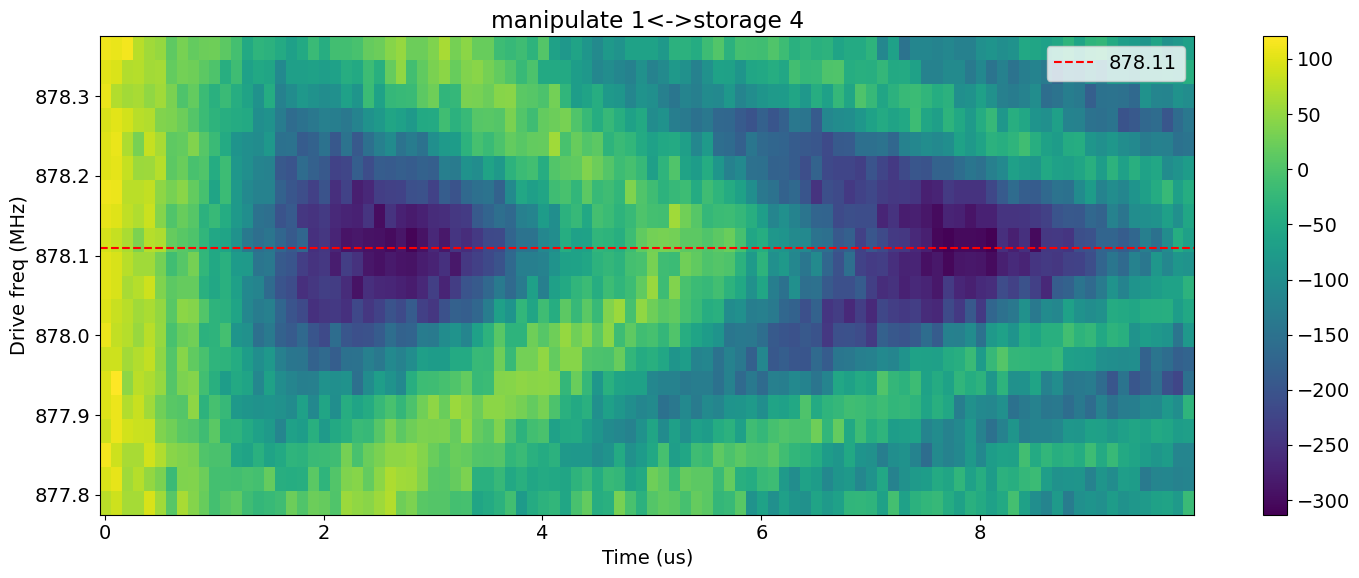

In [145]:
# with coupler excited
file_list = np.arange(1116, 1136, 1)
# file_list = np.arange(456,475, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[878.11], vlines=None, title="manipulate 1<->storage 4")

##### S5

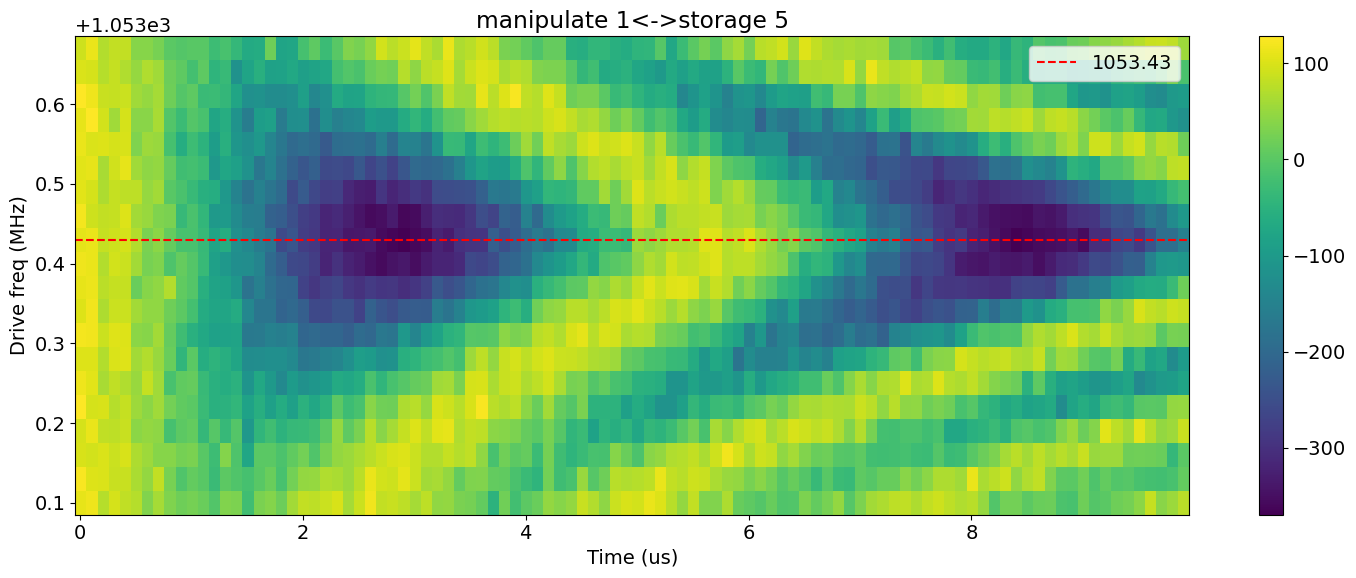

In [146]:
# with coupler ground
file_list = np.arange(1056, 1076, 1)
# file_list = np.arange(527,532, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1053.43], vlines=None, title="manipulate 1<->storage 5")

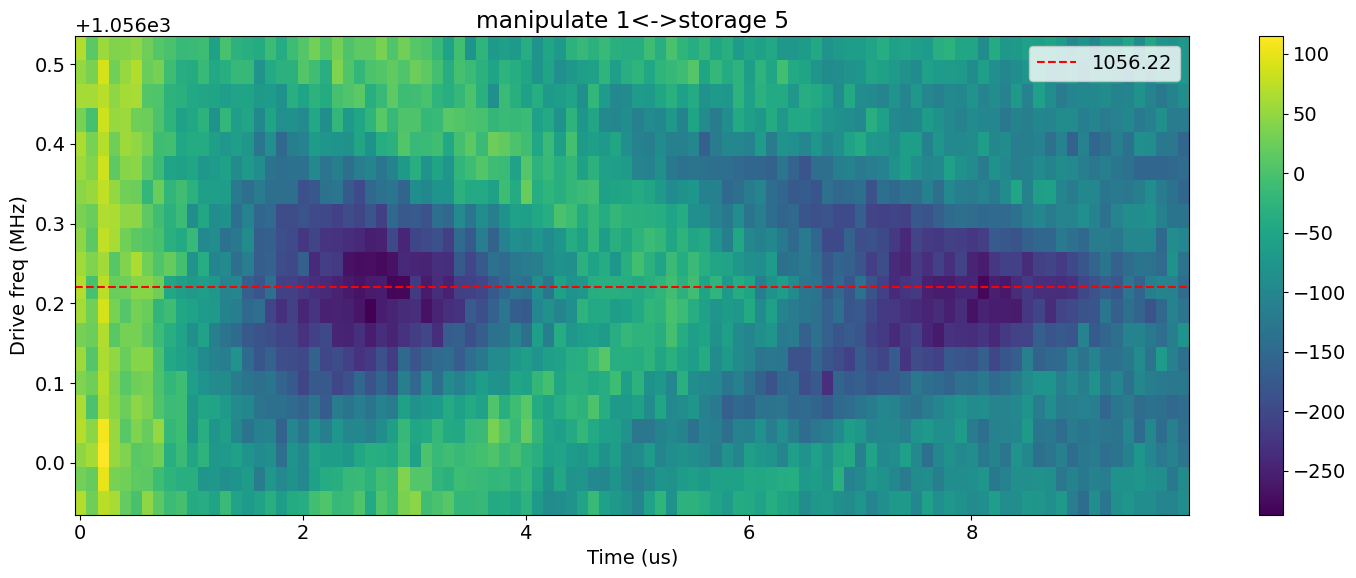

In [150]:
# with coupler excited
file_list = np.arange(1136, 1156, 1)
# file_list = np.arange(506,524, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1056.22], vlines=None, title="manipulate 1<->storage 5")

##### S6

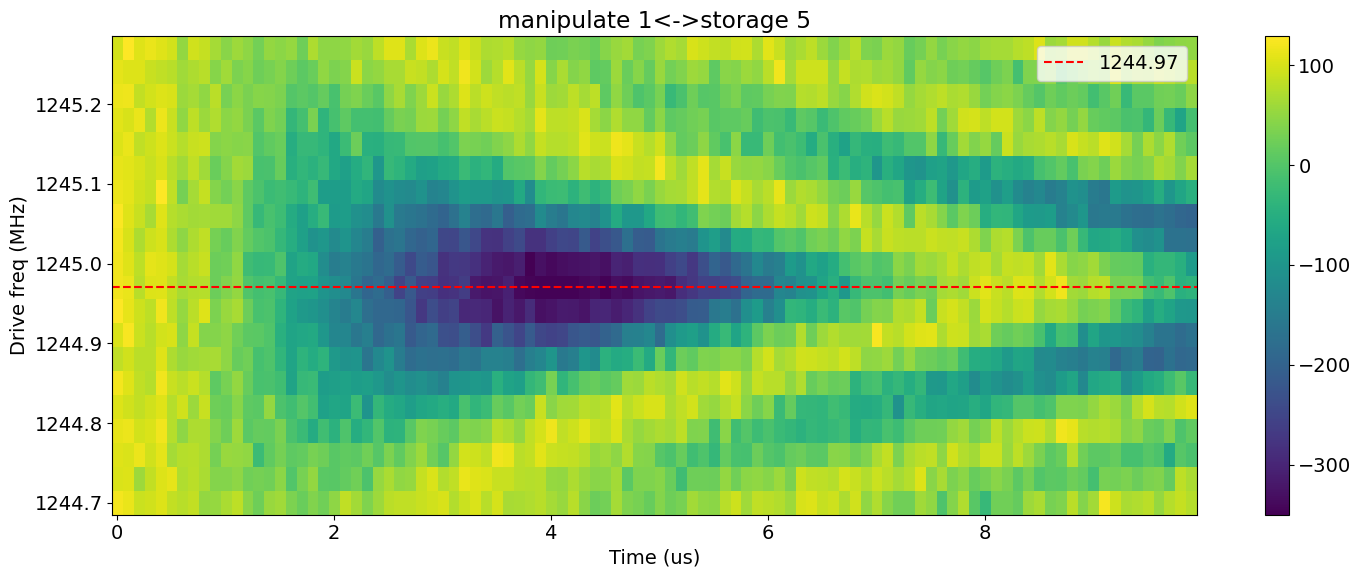

In [155]:
# with coupler ground
file_list = np.arange(1076, 1096, 1)
# file_list = np.arange(566,573, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1244.97], vlines=None, title="manipulate 1<->storage 5")

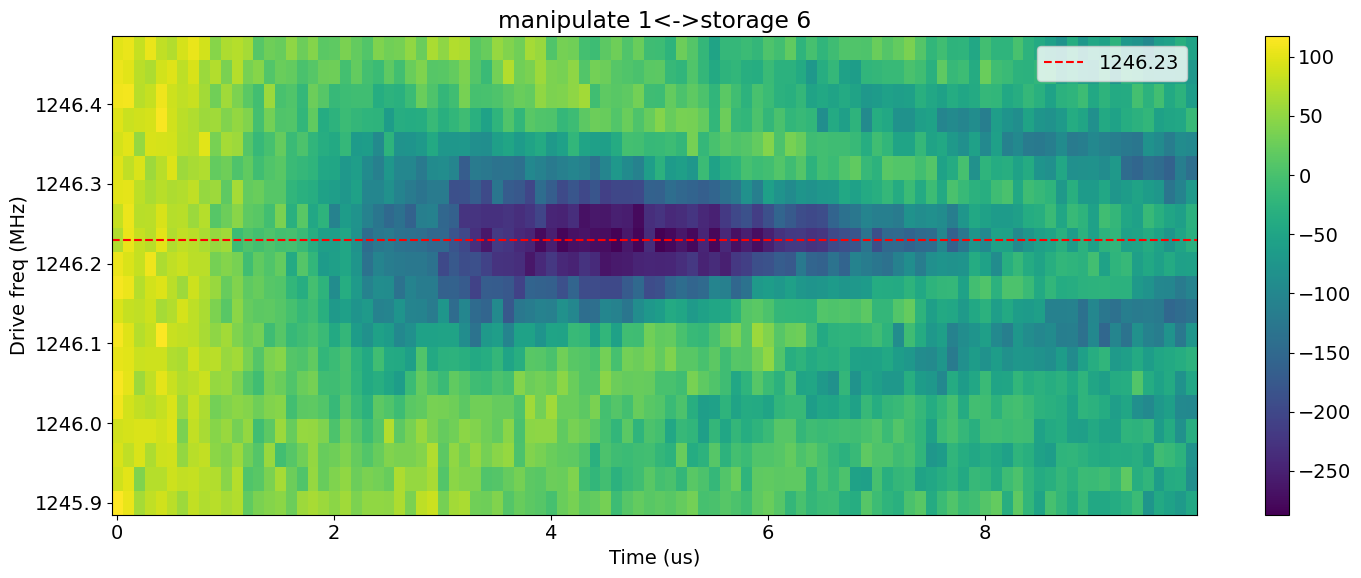

In [152]:
# with coupler excited
file_list = np.arange(1156, 1176, 1)
# file_list = np.arange(553,562, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1246.23], vlines=None, title="manipulate 1<->storage 6")

##### S7

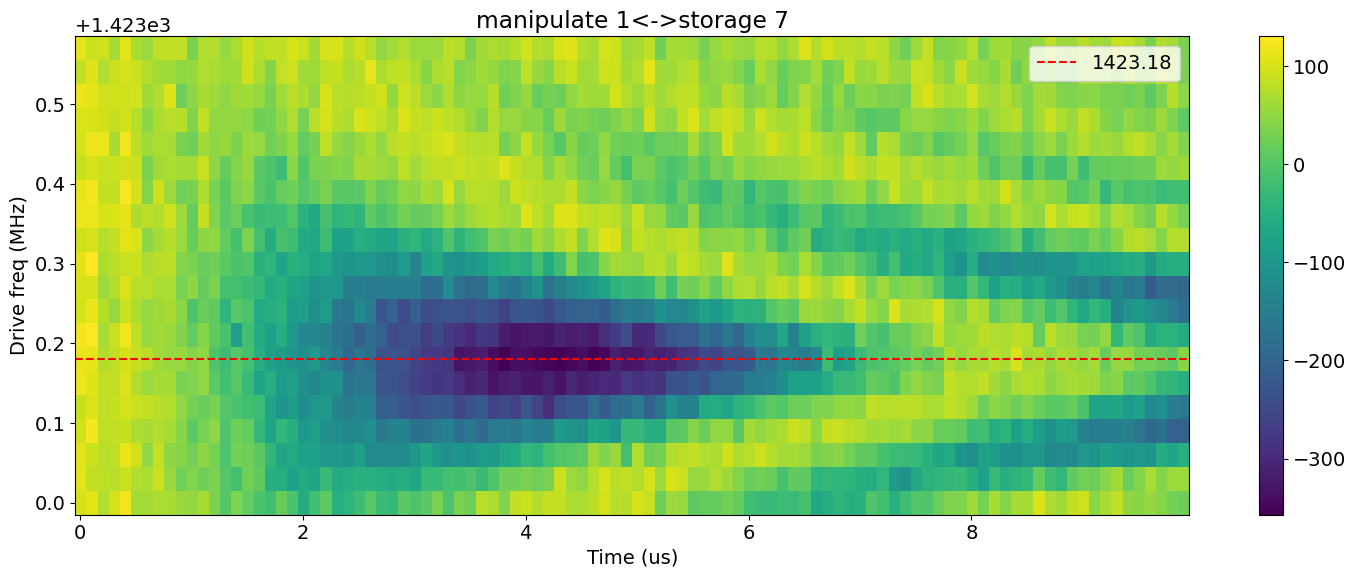

In [157]:
# with coupler ground
file_list = np.arange(1096, 1116, 1)
# file_list = np.arange(601,609, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1423.18], vlines=None, title="manipulate 1<->storage 7")

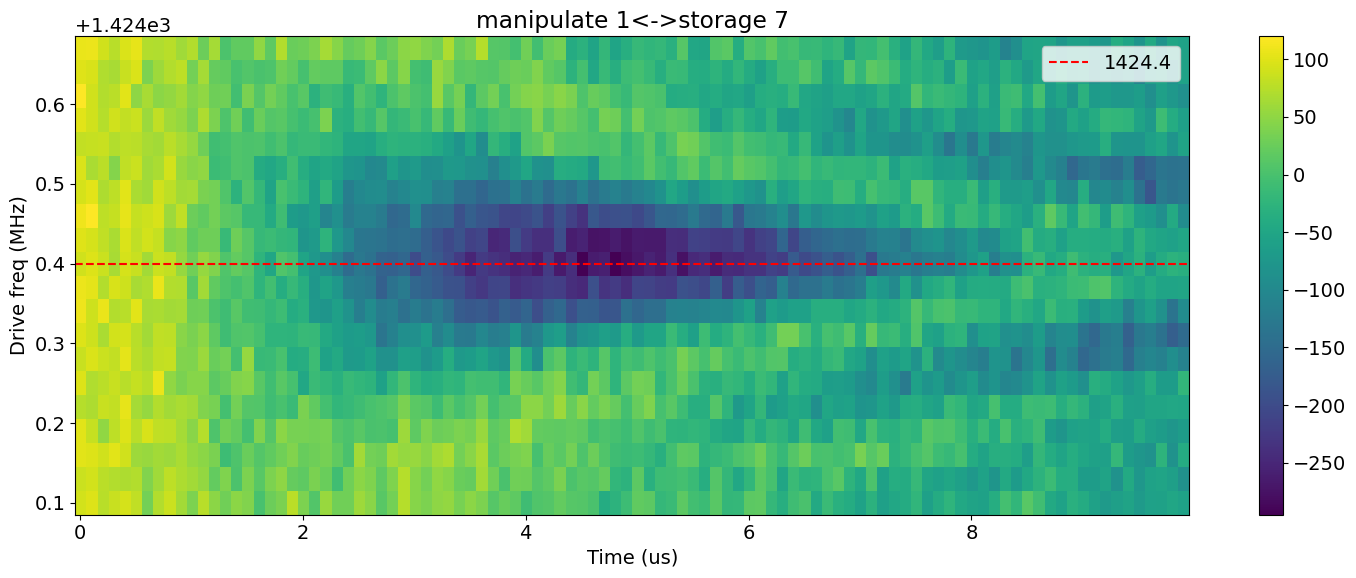

In [142]:
# with coupler excited
file_list = np.arange(1176, 1196, 1)
# file_list = np.arange(580,594, 1) # coupler e
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
name = '_storage_sideband_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1424.4], vlines=None, title="manipulate 1<->storage 7")

# Coupler Anharmonicity

## Length rabi f0-g1 M1 when coupler excited 

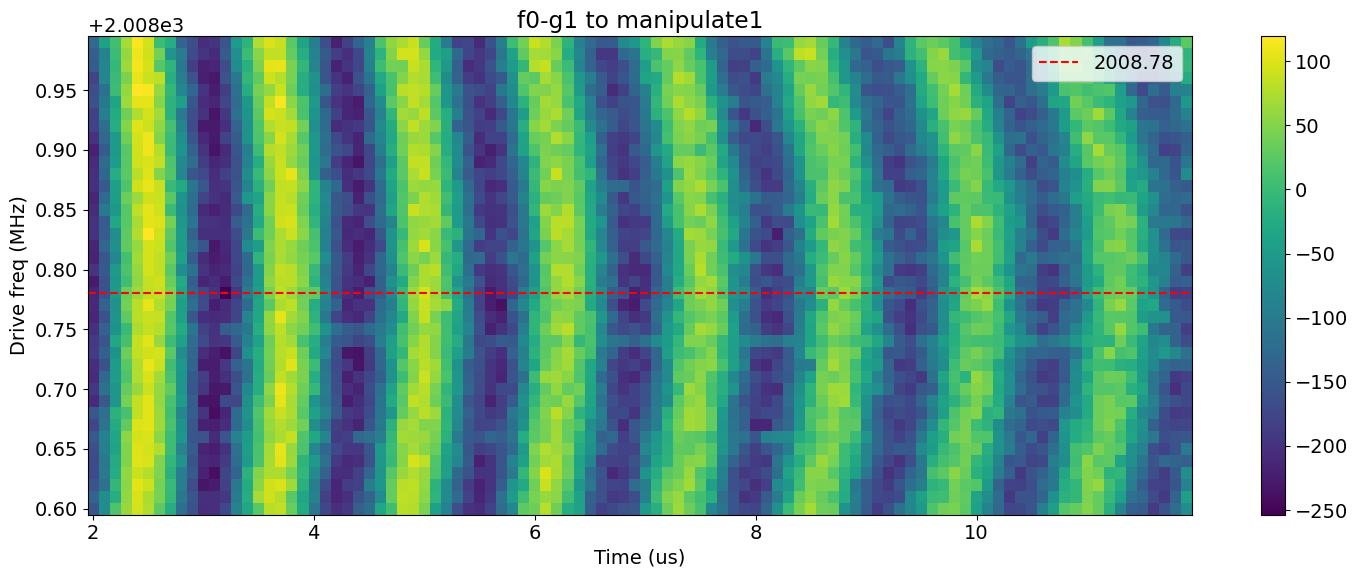

In [ ]:
file_list = np.arange(131, 171,1) # with coupler photon
y_list = []
freq_list = []
name = '_length_rabi_f0g1_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi'][0:-1]
    # if attrs['config']['expt']['active_reset']:
    #     # for each time, post select the single shot data
    #     Ilist = []
    #     Qlist = []
    #     threshold = -4#attrs['config']['expt']['threshold'][0]
    #     readout_per_round = 4#attrs['config']['expt']['readout_per_round']
    #     for ii in range(len(temp_data['idata'])-1):
    #         Ig, Qg = filter_data_IQ(temp_data['idata'][ii], temp_data['qdata'][ii], threshold, readout_per_round)
    #         Ilist.append(np.mean(Ig))
    #         Qlist.append(np.mean(Qg))
        
        
    #signal_y = Ilist
    #print(len(signal_y))
    
    len_x = temp_data['xpts'][0:-1]
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['freq'])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[2008.78], vlines=None, normalize = normalize, title="f0-g1 to manipulate1")

[239.46532436   0.79772158  92.54722729  17.87475205 -68.17375291
  -3.51779997]
Decay from avgi [us] 17.874752048455914
Rate [MHz] 0.7977215834324998
Pi length from avgi data [us]: 0.6179152963739796
	Pi/2 length from avgi data [us]: 0.3045227479057782
Fit params:  [239.46532436   0.79772158  92.54722729  17.87475205 -68.17375291
  -3.51779997]

Decay from avgq [us] 14.611185253755975
Rate [MHz] 0.8000649344732174
Pi length from avgq data [us]: 0.6220716848216814
Pi/2 length from avgq data [us]: 0.3110358424108407
Fit params:  [ 196.16864286    0.80006493   90.82881297   14.61118525 -147.08751368
   -3.91302455]


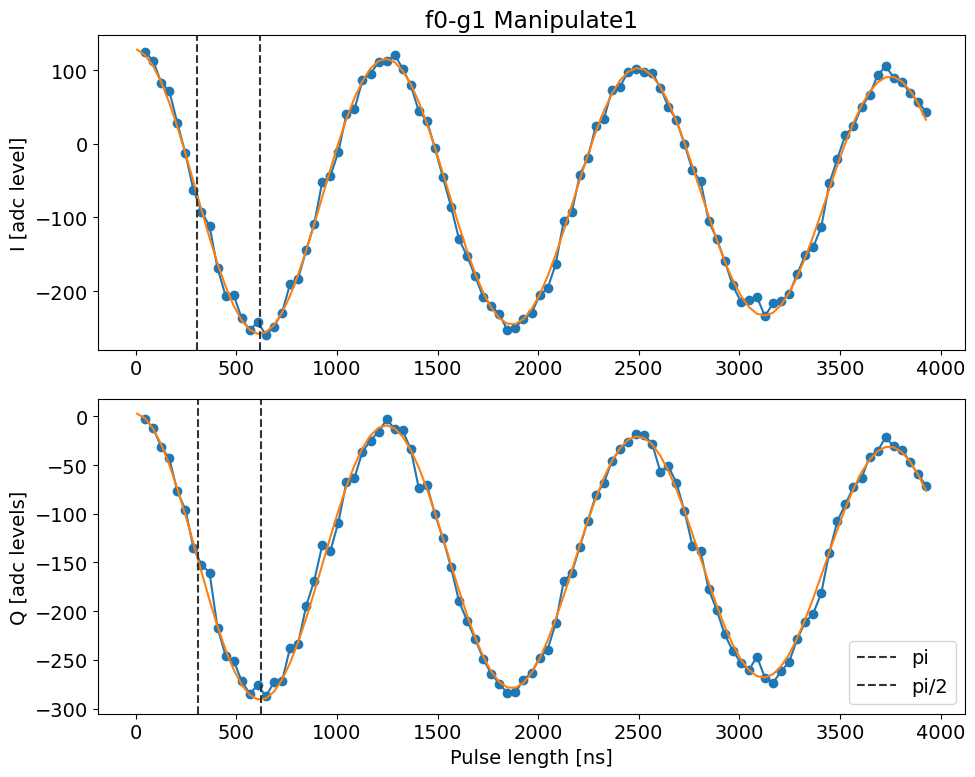

In [ ]:
temp_data, attrs = prev_data(expt_path, '00004_LengthRabiGeneralF0g1Experiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None,None,None,None,None,None ], vlines = None,
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='f0-g1 Manipulate1')

In [ ]:
freq = attrs['config']['expt']['freq']
pi_length = temp_data['pi_length']
pi2_length = temp_data['pi2_length']
gain = 15000

ds.update_all('M1_ce', freq, 0.02, pi_length, pi2_length, gain)

# ds.append_dataset('M1_ce', freq, 0.02, pi_length, pi2_length, gain)

C:\_Lib\python\multimode_expts\dataset.py:92: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(new_row, ignore_index=True)


In [ ]:
ds.df

stor_name  freq (MHz)  precision (MHz)   pi (mus)  h_pi (mus)  \
0      M1-S1     349.415             0.01   0.977143    0.488571   
1      M1-S2     520.925             0.01   1.130904    0.565452   
2      M1-S3     696.665             0.01   1.333910    0.666955   
3      M1-S4     875.845             0.01   1.254287    0.627144   
4      M1-S5    1053.395             0.01   1.973198    0.986599   
5      M1-S6    1245.160             0.01   1.595310    0.797655   
6      M1-S7    1423.040             0.01   1.685008    0.842504   
7      M1-S8      -1.000            -1.00  -1.000000   -1.000000   
8      M1-S9      -1.000            -1.00  -1.000000   -1.000000   
9     M1-S10      -1.000            -1.00  -1.000000   -1.000000   
10    M1-S11      -1.000            -1.00  -1.000000   -1.000000   
11    M1-S12      -1.000            -1.00  -1.000000   -1.000000   
12        M1    2007.540             0.02   0.616406    0.304546   
13        M2    1834.840             0.01   1.046171    0.521769   
14     M2-S1     175.630             0.01   2.173484    1.086742   
15     M2-S2     346.840             0.01   0.908835    0.454417   
16     M2-S3     523.220             0.01   1.561615    0.780808   
17     M2-S4     702.650             0.01   1.386764    0.693382   
18     M2-S5     878.780             0.01   1.303372    0.651686   
19     M2-S6    1070.100             0.01   2.379622    1.189811   
20     M2-S7    1249.700             0.01   1.796981    0.898491   
21     M2-M1     173.790             0.01   0.463481    0.231741   
22     M1-D1    2313.300             0.01  10.000000    0.000000   
23     M2-D2    2093.900             0.01  15.000000    0.000000   
24      M1-C     973.230             0.02   0.251127    0.122354   
25     M1_ce    2008.780             0.02   0.617915    0.304523   

    gain (DAC units)                 last_update  
0               3000  2024-10-26 17:42:46.915401  
1               5000  2024-10-26 17:43:09.376354  
2               9000  2024-10-26 17:43:34.019332  
3               9000  2024-10-26 17:43:51.867832  
4               7500  2024-10-26 17:44:14.975970  
5              13500  2024-10-26 17:44:34.143253  
6              13500  2024-10-26 17:44:51.587301  
7                 -1                     51:31.3  
8                 -1                     51:31.3  
9                 -1                     51:31.3  
10                -1                     51:31.3  
11                -1                     51:31.3  
12             15000  2025-01-20 06:45:27.220400  
13             15000  2024-11-28 12:07:48.539701  
14              1000                     28:20.8  
15              5000                     33:56.1  
16              5000                     22:30.3  
17              9000                     25:33.1  
18             13500                     00:05.4  
19              9000                     30:59.0  
20             12000                     56:07.5  
21              2000  2024-10-06 01:47:25.946153  
22              5000  2024-11-29 10:03:41.582290  
23              8000  2024-11-29 10:03:41.596222  
24              1000  2025-01-20 09:34:00.029234  
25             15000  2025-01-20 09:52:35.311227

## Coupler $|f\rangle$ spectroscopy 

Found peak in amps at [MHz] 1034.676037632915, HWHM 9.315653940670959
Found peak in I at [MHz] 1036.9266803958837, HWHM 9.791269909250405
Found peak in Q at [MHz] 1032.4292134019224, HWHM 10.23668755658043


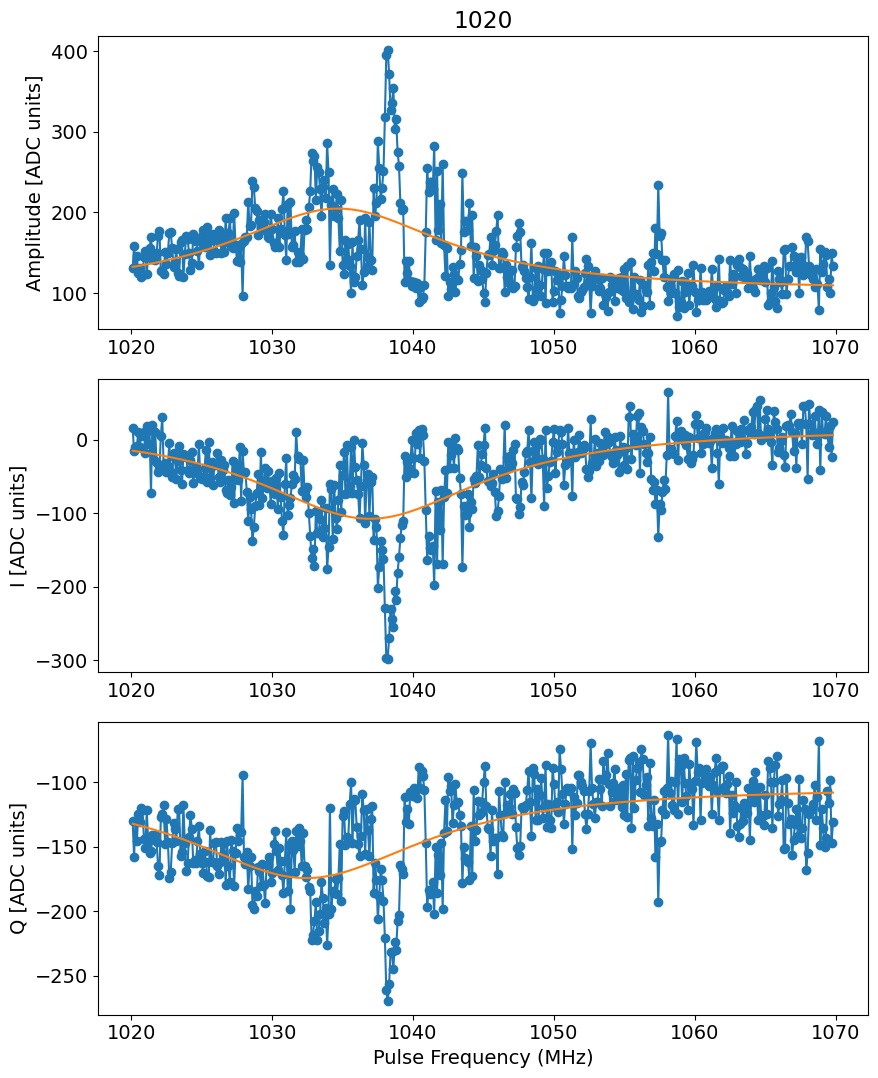

In [32]:
temp_data, attrs = prev_data(expt_path, '00007_FluxSpectroscopyF0g1Experiment.h5')
qubit_spectroscopy_display(temp_data, title=attrs['config']['expt']['start'], vlines=None)

Found peak in amps at [MHz] 1032.0799302706948, HWHM 3.964674234385106
Found peak in I at [MHz] 1032.0677777784015, HWHM 5.923207695852879
Found peak in Q at [MHz] 1032.0132054907353, HWHM 5.338733032340669


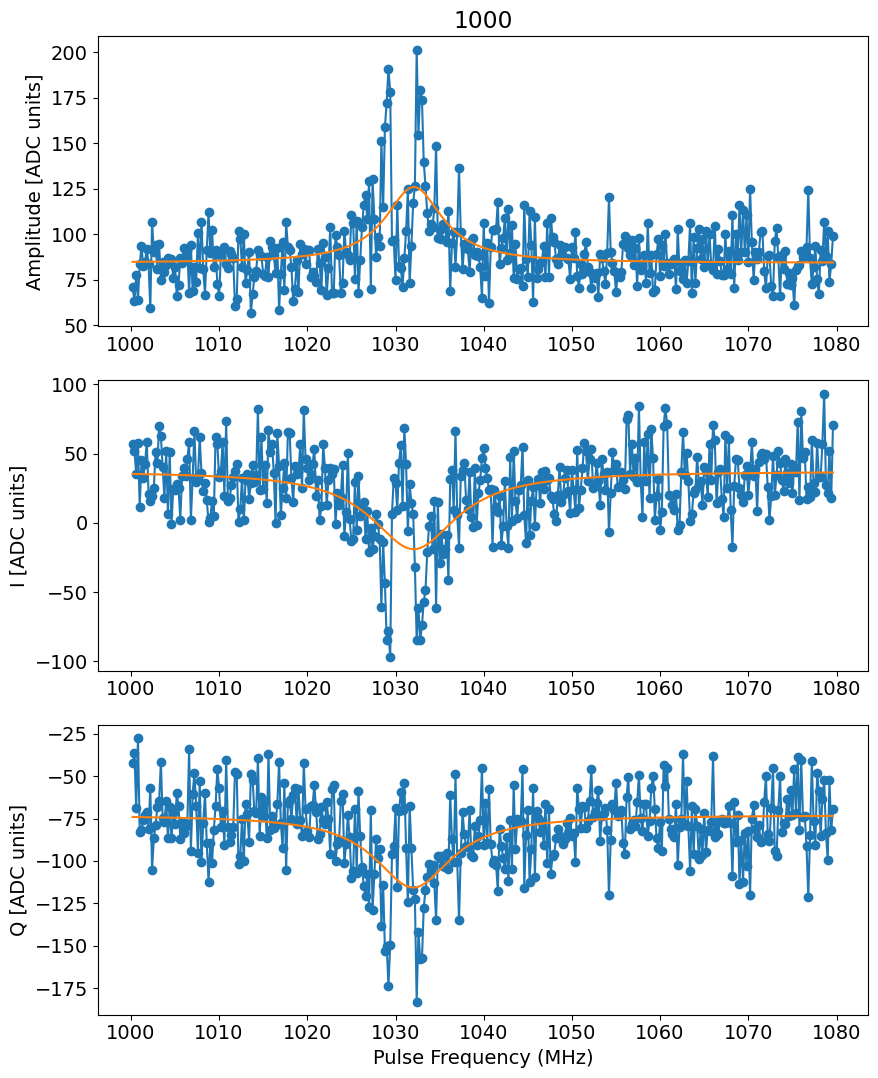

In [29]:
temp_data, attrs = prev_data(expt_path, '00003_FluxSpectroscopyF0g1Experiment.h5')
qubit_spectroscopy_display(temp_data, title=attrs['config']['expt']['start'], vlines=None)

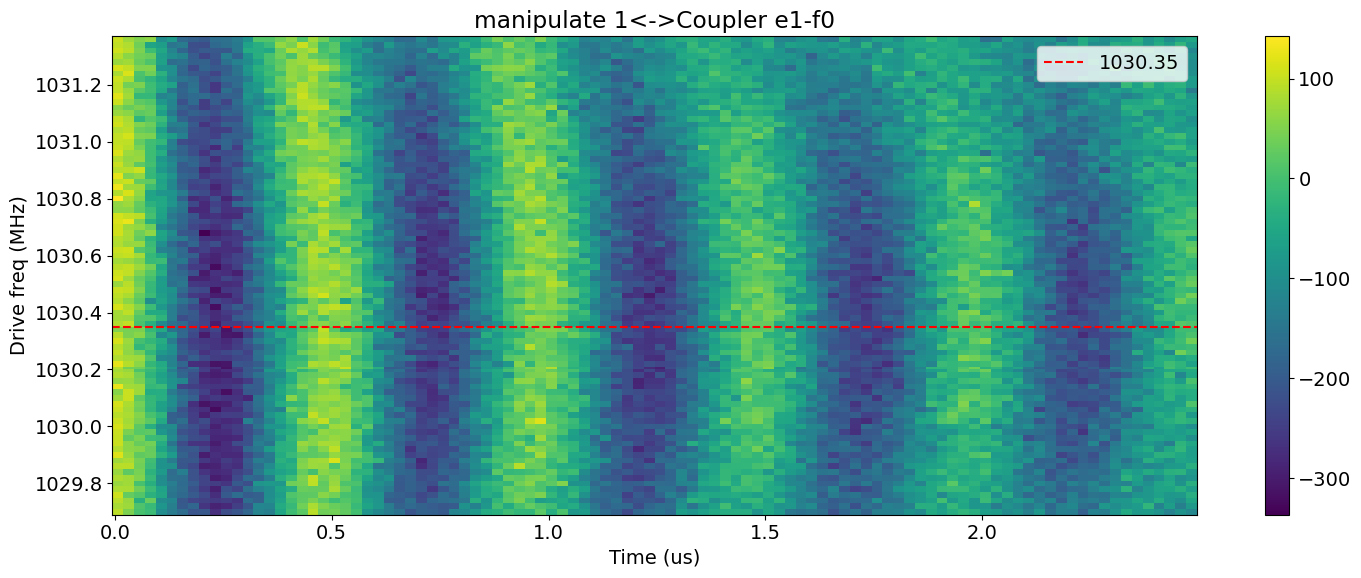

In [48]:
file_list = np.arange(96,119,1)
file_list = np.concatenate((np.arange(191, 206,1), np.arange(180, 191,1), np.arange(120,179,1)))
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    temp_data, attrs = prev_data(expt_path, full_name)  # ef
    signal_y = temp_data['avgi']
    len_x = temp_data['xpts']
    y_list.append(signal_y)
    freq_list.append(attrs['config']['expt']['flux_drive'][1])

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[1030.35], vlines=None, title="manipulate 1<->Coupler e1-f0")

In [47]:
1030.35 - 973.23

57.11999999999989

# F0g1 Spectroscopy

Found peak in amps at [MHz] 1987.9136452562318, HWHM 0.23701783390584044
Found peak in I at [MHz] 1993.0941855723606, HWHM -1.1380785192262723
Found peak in Q at [MHz] 1987.88258698256, HWHM 0.33906697324309343


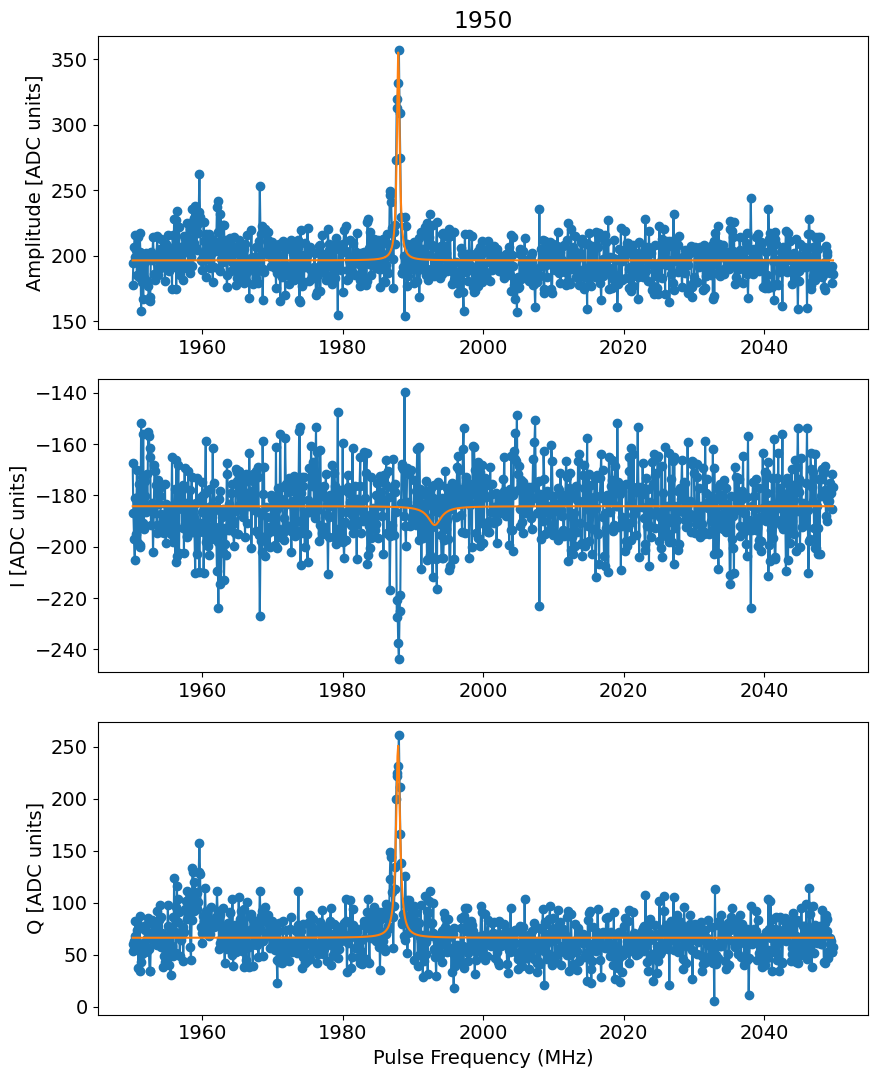

In [12]:
temp_data, attrs = prev_data(expt_path, '00000_PulseProbeF0g1SpectroscopyExperiment.h5')
#temp_data, attrs = prev_data(expt_path, '00122_fluxspectroscopy_f0g1_dc_flux_sweep.h5')

qubit_spectroscopy_display(temp_data, title=attrs['config']['expt']['start'], vlines=None)
# gain from attrs

# Length Rabi Sweep

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


File 00513_length_rabi_f0g1_sweep.h5 not found
File 00514_length_rabi_f0g1_sweep.h5 not found
File 00515_length_rabi_f0g1_sweep.h5 not found
File 00516_length_rabi_f0g1_sweep.h5 not found
File 00517_length_rabi_f0g1_sweep.h5 not found


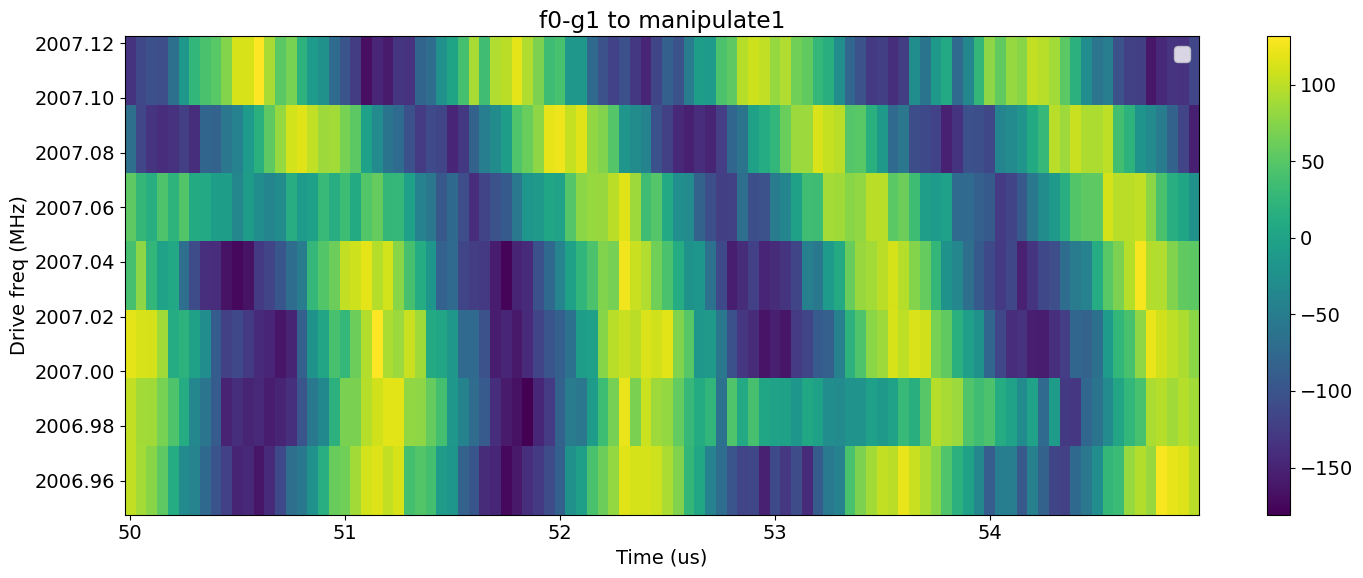

In [666]:
# file_list = np.arange(427, 450, 1) # -------
# file_list = np.concatenate(([470, 471, 472], np.arange(461, 469, 1))) # -------
file_list = np.arange(474, 488, 1) # -------
file_list = np.arange(506, 518, 1)
y_list = []
freq_list = []
name = '_length_rabi_f0g1_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try:
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi'][0:-1]

        
        len_x = temp_data['xpts'][0:-1]
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['freq'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[], vlines=None, normalize = normalize, title="f0-g1 to manipulate1")

## Length rabi f0-g1 M1

[204.22964355   0.88906637  93.85946681  94.23005357 -20.28766618
  -2.93302302]
Decay from avgi [us] 94.23005357269454
Rate [MHz] 0.8890663658895916
Pi length from avgi data [us]: 0.5503292865661726
	Pi/2 length from avgi data [us]: 0.2691354301886993
Fit params:  [204.22964355   0.88906637  93.85946681  94.23005357 -20.28766618
  -2.93302302]

Decay from avgq [us] 45.74599043997323
Rate [MHz] 0.8905705953019697
Pi length from avgq data [us]: 0.5526038364012268
Pi/2 length from avgq data [us]: 0.2763019182006134
Fit params:  [199.66559091   0.8905706   92.83221808  45.74599044 -93.15399077
  -2.93302455]


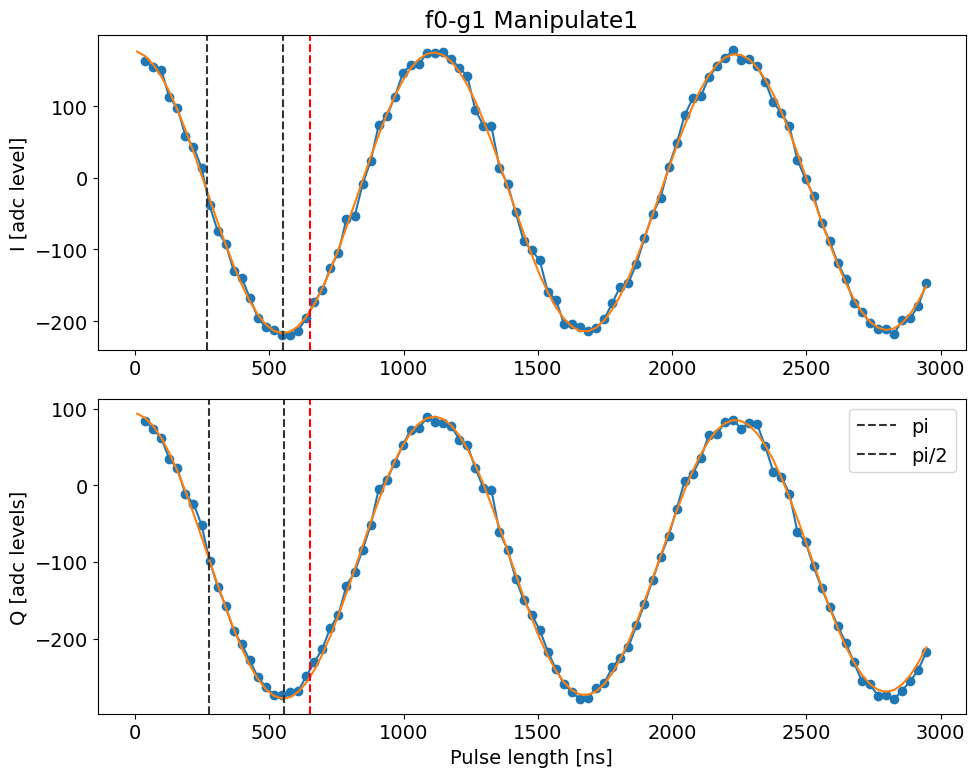

In [419]:
temp_data, attrs = prev_data(expt_path, '00014_LengthRabiGeneralF0g1Experiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None, None,None,None,None,None ],
                              vlines = [650],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='f0-g1 Manipulate1')

## Manipulate 1 T1

Fit T1 avgi [us]: 153.28652568468854
Fit T1 avgq [us]: 73.8963969301676


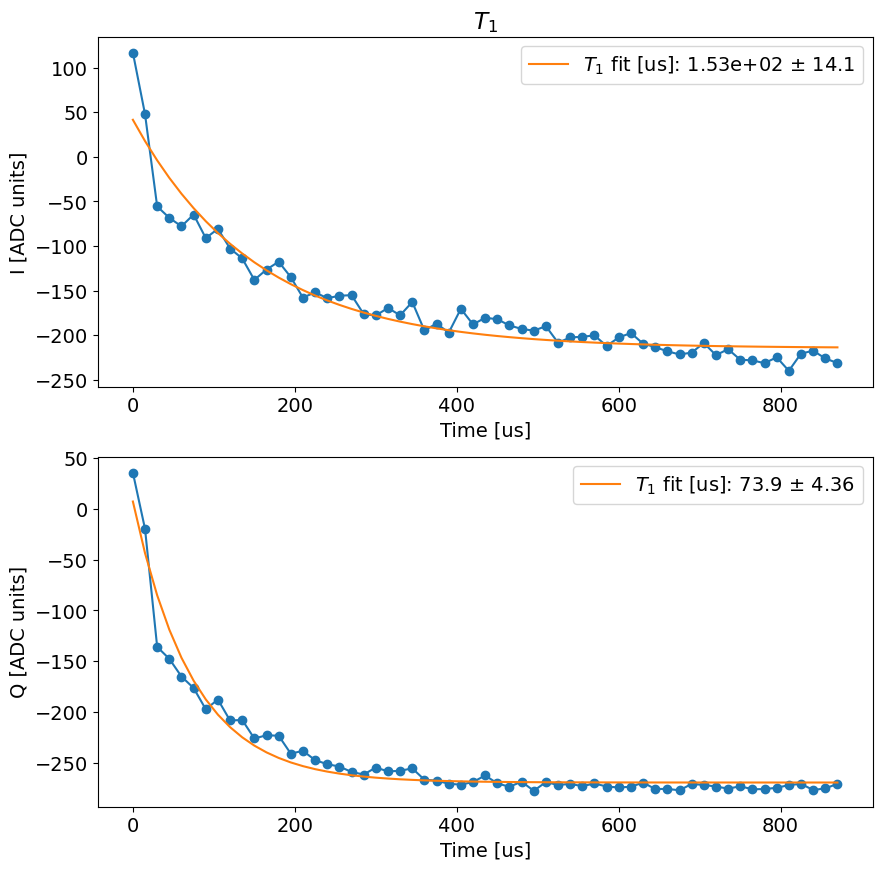

In [379]:
# DC flux=0.27, expid=1
# DC flux=0.17, expid=2
# temp_data, attrs = prev_data(expt_path, '00010_T1CavityExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00086_cavity_t1_dc_flux_sweep_new.h5')
t1_display(data = temp_data, fit = True, active_reset = False)

In [307]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': 127.0,
    'f_ge': 3568.1751638611518,
    'f_ge_resolved': 3568.1751638611518,
    'f_ge_idle': 3568.1751638611518,
    'f_ef': 3425.5564066067,
    'f_ef_idle': 3425.5564066067,
    'ramp_sigma': 0.005,
    'ramp_sigma_num': 3,
    'pulses': {'pi_ge': {'gain': 10716,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
      'length': 0.190914187445986,
      'type': 'flat_top'},
     'pi_ge_fast': {'gain': 10682,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_resolved': {'gain': 50,
      'sigma': 0.005,
      'length': 6.553697146578866,
      'type': 'flat_top',
      'repeat_no': 1},
     'hpi_ge': {'gain': 5510, 'length': 0, 'sigma': 0.035, 'type': 'gauss'},
     'hpi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
   

# F0g1 Scan Dataset as a function of Coupler DC Flux

In [18]:
# Original lists
currents = [0.08, 0.12, 0.22, 0.32, 0.5, 0.27, 0.17, -0.1, -0.2, 0, 0.6, 0.55, 0.4, -0.15, -0.05]
f0g1_freqs = [
    1993.55, 1996.45, 2002.55, 2007, 2011.97, 
    2005, 1999.7, 1980.8, 1977.7, 1987.46, 2013.8, 2012.93, 2009.6, 1978.6, 1983.84
]
pi_lengths = [
    0.562878407, 0.573263647, 0.597216575, 0.604688822, 0.608122803, 
    0.607997218, 0.588880852, 0.556092728, 0.55045291, 0.556268435, 0.61,0.608686712, 0.606480529, 
    0.546402768, 0.5526038364012268



]

 

print("Sorted currents:", currents)
print("Updated f0g1_freqs:", f0g1_freqs)
print("Updated pi_lengths:", pi_lengths)



Sorted currents: [-0.2, -0.15, -0.1, -0.05, 0, 0.08, 0.12, 0.17, 0.22, 0.27, 0.32, 0.4, 0.5, 0.55, 0.6]
Updated f0g1_freqs: [1977.7, 1978.6, 1980.8, 1983.84, 1987.46, 1993.55, 1996.45, 1999.7, 2002.55, 2005, 2007, 2009.6, 2011.97, 2012.93, 2013.8]
Updated pi_lengths: [0.55045291, 0.546402768, 0.556092728, 0.5526038364012268, 0.556268435, 0.562878407, 0.573263647, 0.588880852, 0.597216575, 0.607997218, 0.604688822, 0.606480529, 0.608122803, 0.608686712, 0.61]


In [19]:
# now creating a dataframe 
df = pd.DataFrame({'currents': currents, 'f0g1_freqs': f0g1_freqs, 'pi_lengths': pi_lengths})
df

currents  f0g1_freqs  pi_lengths
0      -0.20     1977.70    0.550453
1      -0.15     1978.60    0.546403
2      -0.10     1980.80    0.556093
3      -0.05     1983.84    0.552604
4       0.00     1987.46    0.556268
5       0.08     1993.55    0.562878
6       0.12     1996.45    0.573264
7       0.17     1999.70    0.588881
8       0.22     2002.55    0.597217
9       0.27     2005.00    0.607997
10      0.32     2007.00    0.604689
11      0.40     2009.60    0.606481
12      0.50     2011.97    0.608123
13      0.55     2012.93    0.608687
14      0.60     2013.80    0.610000

Text(0, 0.5, 'Manipulate1 Frequency (GHz)')

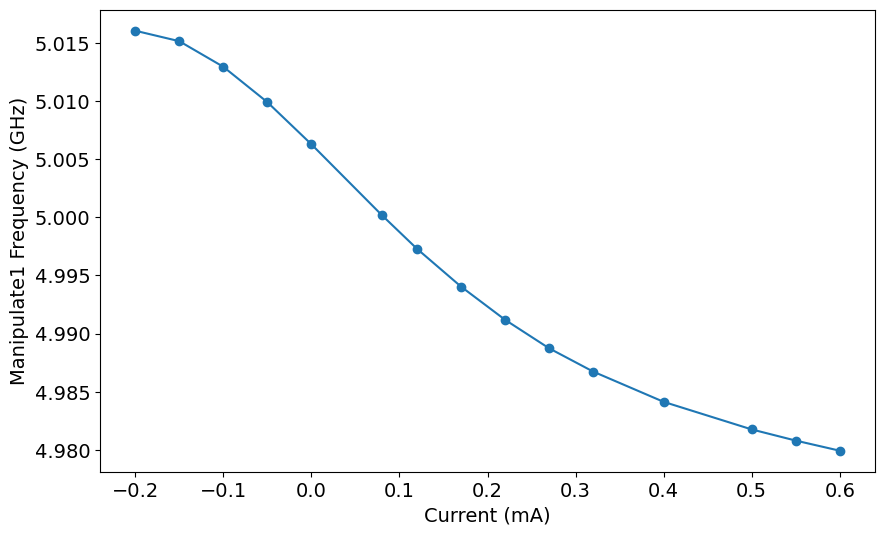

In [20]:
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
# plot current vs f0g1_freqs
plt.plot(df['currents'], (-1 * np.array(df['f0g1_freqs'].values) + qubit_gf) * 1e-3, 'o-')
plt.xlabel('Current (mA)')
plt.ylabel('Manipulate1 Frequency (GHz)')

## Prepping for T1 scan on manipulate using interpolation of refernce data 

Interpolated frequency at current 0.55: 2012.93


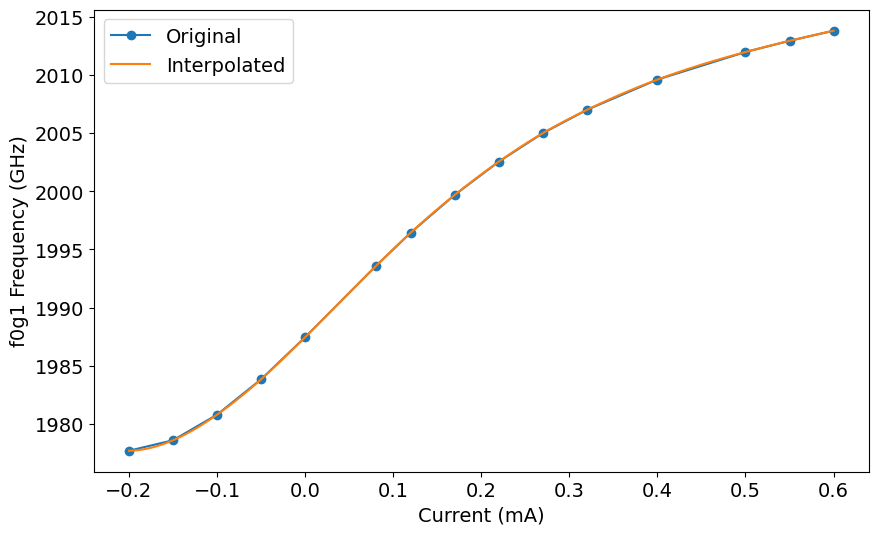

In [21]:

from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline, CubicSpline

# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
interp_func = interp1d(currents, f0g1_freqs, kind='linear', fill_value="extrapolate")
interp_func = CubicSpline(currents, f0g1_freqs)#, k=2, s=0)

# Interpolate frequency at current of 0.55
current_to_interpolate = 0.55
interpolated_frequency = interp_func(current_to_interpolate)

print(f"Interpolated frequency at current {current_to_interpolate}: {interpolated_frequency}")
#plot 
plt.plot(currents, f0g1_freqs, 'o-', label='Original')
xdata = np.linspace(min(currents), max(currents), 1000)
plt.plot(xdata, interp_func(xdata), '-', label='Interpolated')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()

In [22]:
interp_func(-0.05)

array(1983.84)

In [23]:
# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
f0g1_interp_func = CubicSpline(currents, f0g1_freqs)#, kind='linear', fill_value="extrapolate")
pi_interp_func = interp1d(currents, pi_lengths)#, kind='linear', fill_value="extrapolate")

# currents
custom_currents = [0.55, 0.56, 0.575, 0.58, 0.585, 0.59, 0.595]
currents_interped = np.round(np.linspace(min(currents), max(currents), 30), 2).tolist() #+ [0.56, 0.58, 0.59]
currents_interped = np.sort(np.array(currents_interped + custom_currents))

f0g1_freqs_interped = f0g1_interp_func(currents_interped)
pi_lengths_interped = pi_interp_func(currents_interped)

interp_df = pd.DataFrame({'currents': currents_interped, 'f0g1_freqs': f0g1_freqs_interped, 'pi_lengths': pi_lengths_interped})
interp_df

currents   f0g1_freqs  pi_lengths
0     -0.200  1977.700000    0.550453
1     -0.170  1978.054632    0.548023
2     -0.140  1978.952782    0.548341
3     -0.120  1979.797564    0.552217
4     -0.090  1981.350365    0.555395
5     -0.060  1983.176570    0.553302
6     -0.030  1985.238591    0.554070
7     -0.010  1986.708226    0.555536
8      0.020  1988.980906    0.557921
9      0.050  1991.277471    0.560400
10     0.080  1993.550000    0.562878
11     0.100  1995.026871    0.568071
12     0.130  1997.135132    0.576387
13     0.160  1999.083783    0.585757
14     0.190  2000.885747    0.592215
15     0.210  2002.010330    0.595549
16     0.240  2003.582987    0.601529
17     0.270  2005.000000    0.607997
18     0.300  2006.244916    0.606012
19     0.320  2007.000000    0.604689
20     0.350  2008.053504    0.605361
21     0.380  2009.013784    0.606033
22     0.410  2009.876563    0.606645
23     0.430  2010.398763    0.606973
24     0.460  2011.114500    0.607466
25     0.490  2011.764763    0.607959
26     0.520  2012.366520    0.608348
27     0.540  2012.746060    0.608574
28     0.550  2012.930000    0.608687
29     0.560  2013.110340    0.608949
30     0.570  2013.287295    0.609212
31     0.575  2013.374570    0.609343
32     0.580  2013.461080    0.609475
33     0.585  2013.546851    0.609606
34     0.590  2013.631910    0.609737
35     0.595  2013.716284    0.609869
36     0.600  2013.800000    0.610000

In [24]:
interp_df['currents'].values

array([-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ])

In [25]:
f0g1_interp_func(0.4)

array(2009.6)

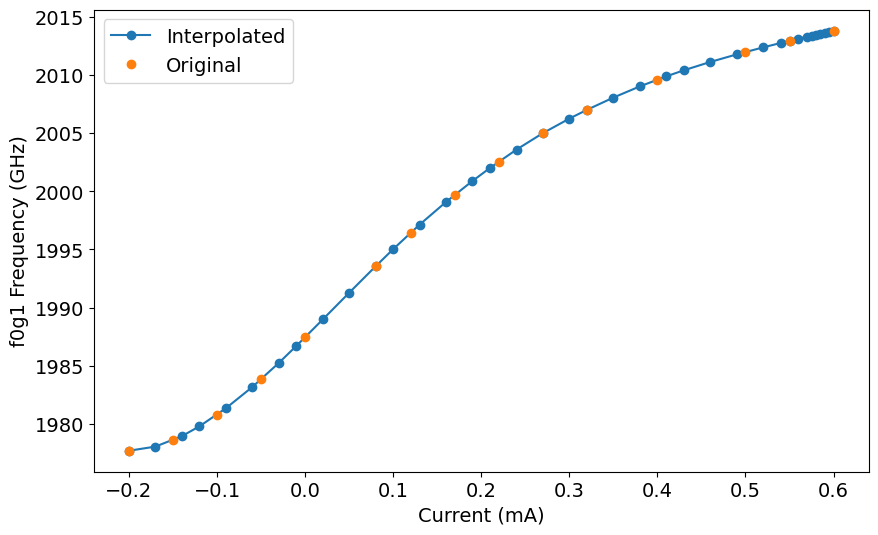

In [26]:
# compare interperted data with original data
# plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['f0g1_freqs'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()


Text(0, 0.5, 'Pi Pulse Length (us)')

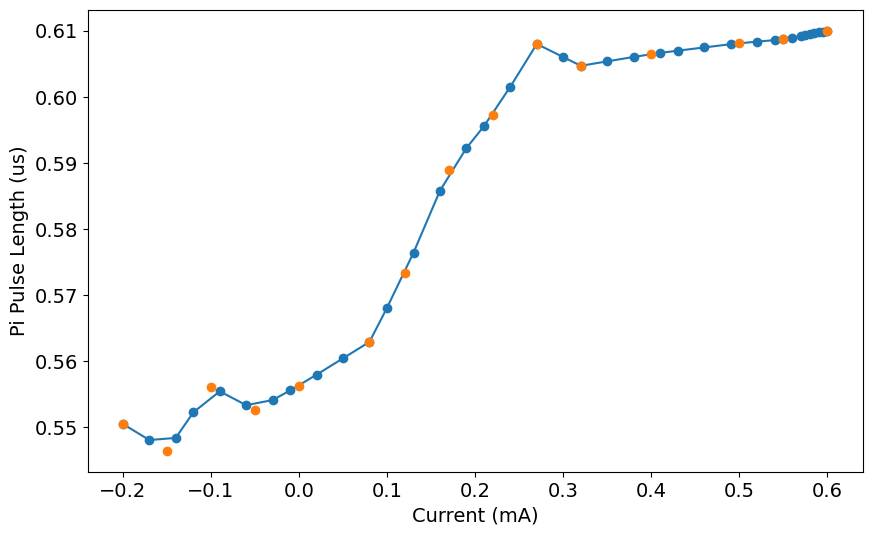

In [27]:
# compare interperted data with original data
# plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['pi_lengths'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('Pi Pulse Length (us)')

## Manipulate 1 T1 data

In [68]:
DC_flux_list = [-0.2 , -0.17, -0.14, -0.12, -0.09, -0.06, -0.03, -0.01,  0.02,
        0.05,  0.08,  0.1 ,  0.13,  0.16,  0.19,  0.21,  0.24,  0.27,
        0.3 ,  0.32,  0.35,  0.38,  0.41,  0.43,  0.46,  0.49,  0.52,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ]
data_file_list = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62, 65,68,71,74,77, 79]
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

C:\_Lib\python\multimode_expts\experiments\fitting.py:55: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


Text(0, 0.5, 'T1 (us)')

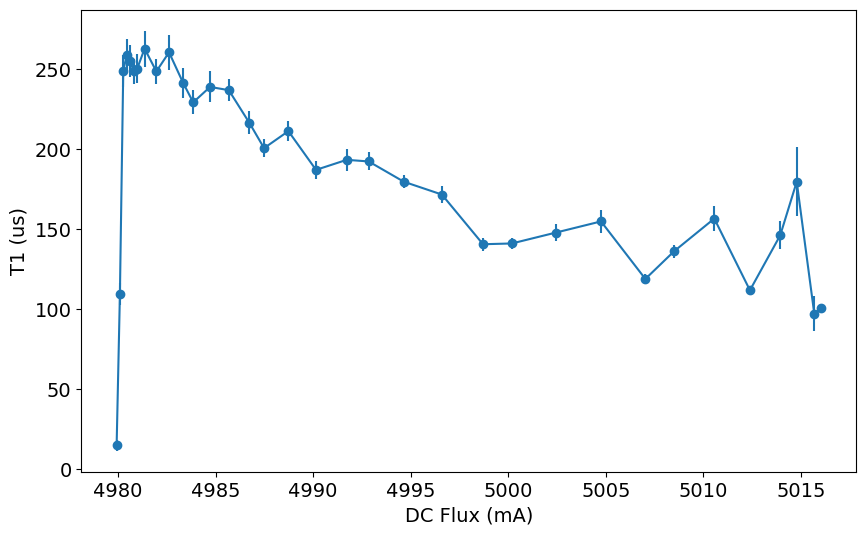

In [69]:
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
xdata = qubit_gf - np.array(f0g1_interp_func(DC_flux_list))

plt.errorbar(xdata, T1_list, yerr=T1_err_list, fmt='o-')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')

In [588]:
# raw data for t1 
DC_flux_list = [-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ]
data_file_list = [82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108,
                  110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
                  139, 142,145,148,151,154,157,160, 162]
file_names = []


name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
                file_names.append(full_name)
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

Text(0.5, 1.0, 'Cache 1 T1 vs DC Flux')

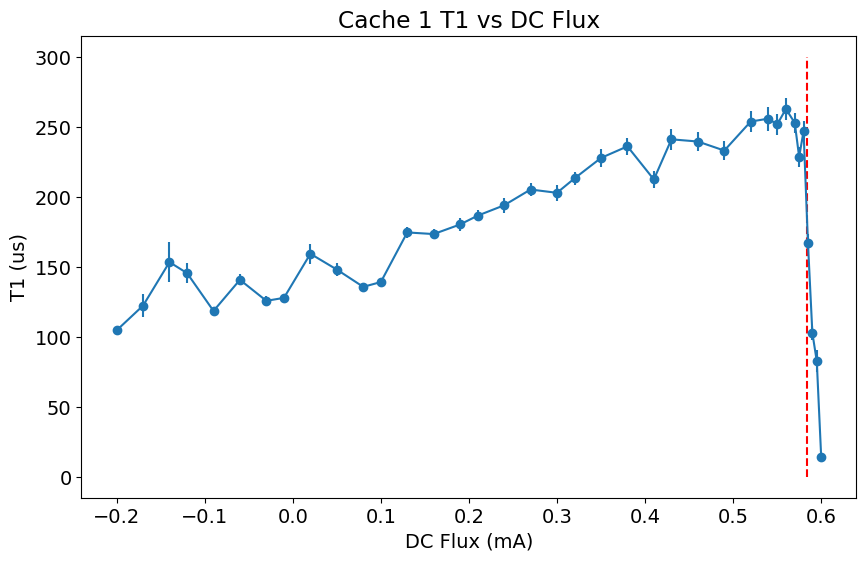

In [589]:
plt.errorbar(DC_flux_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.vlines(0.584, 0, 300, colors='r', linestyles='dashed')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')
plt.title('Cache 1 T1 vs DC Flux')

#### Collecting T1 Data in dataframe

##### Make new Df

In [605]:
man_t1_df = pd.DataFrame({'currents': DC_flux_list, 'T1': T1_list, 'T1_err': T1_err_list, 'file_name': file_names})
man_t1_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


currents          T1     T1_err                             file_name
0     -0.200  104.538594   1.630250  00082_cavity_t1_dc_flux_sweep_new.h5
1     -0.170  122.208819   8.383097  00084_cavity_t1_dc_flux_sweep_new.h5
2     -0.140  153.286526  14.069547  00086_cavity_t1_dc_flux_sweep_new.h5
3     -0.120  145.410579   7.097924  00088_cavity_t1_dc_flux_sweep_new.h5
4     -0.090  118.409589   2.361209  00090_cavity_t1_dc_flux_sweep_new.h5
5     -0.060  140.647633   3.925063  00092_cavity_t1_dc_flux_sweep_new.h5
6     -0.030  125.638037   3.455814  00094_cavity_t1_dc_flux_sweep_new.h5
7     -0.010  127.754302   2.214225  00096_cavity_t1_dc_flux_sweep_new.h5
8      0.020  159.247814   6.985906  00098_cavity_t1_dc_flux_sweep_new.h5
9      0.050  147.987348   4.555701  00100_cavity_t1_dc_flux_sweep_new.h5
10     0.080  135.632508   2.401415  00102_cavity_t1_dc_flux_sweep_new.h5
11     0.100  139.044361   2.503485  00104_cavity_t1_dc_flux_sweep_new.h5
12     0.130  174.497045   3.752354  00106_cavity_t1_dc_flux_sweep_new.h5
13     0.160  173.329849   3.495488  00108_cavity_t1_dc_flux_sweep_new.h5
14     0.190  180.189260   4.342130  00110_cavity_t1_dc_flux_sweep_new.h5
15     0.210  186.489937   3.972938  00112_cavity_t1_dc_flux_sweep_new.h5
16     0.240  193.879323   5.259816  00114_cavity_t1_dc_flux_sweep_new.h5
17     0.270  205.158464   4.287370  00116_cavity_t1_dc_flux_sweep_new.h5
18     0.300  202.790203   5.619073  00118_cavity_t1_dc_flux_sweep_new.h5
19     0.320  213.133707   4.763133  00120_cavity_t1_dc_flux_sweep_new.h5
20     0.350  227.709475   6.420283  00122_cavity_t1_dc_flux_sweep_new.h5
21     0.380  235.973599   6.066481  00124_cavity_t1_dc_flux_sweep_new.h5
22     0.410  212.322599   6.197638  00126_cavity_t1_dc_flux_sweep_new.h5
23     0.430  240.994205   7.469327  00128_cavity_t1_dc_flux_sweep_new.h5
24     0.460  239.425947   6.613163  00130_cavity_t1_dc_flux_sweep_new.h5
25     0.490  232.967954   6.899367  00132_cavity_t1_dc_flux_sweep_new.h5
26     0.520  253.697938   7.656089  00134_cavity_t1_dc_flux_sweep_new.h5
27     0.540  255.765920   8.579806  00136_cavity_t1_dc_flux_sweep_new.h5
28     0.550  251.618263   7.376397  00139_cavity_t1_dc_flux_sweep_new.h5
29     0.560  262.679932   8.036486  00142_cavity_t1_dc_flux_sweep_new.h5
30     0.570  252.718572   7.366628  00145_cavity_t1_dc_flux_sweep_new.h5
31     0.575  228.434973   6.959474  00148_cavity_t1_dc_flux_sweep_new.h5
32     0.580  246.872246   6.923890  00151_cavity_t1_dc_flux_sweep_new.h5
33     0.585  166.797324   6.730212  00154_cavity_t1_dc_flux_sweep_new.h5
34     0.590  102.672317   5.278462  00157_cavity_t1_dc_flux_sweep_new.h5
35     0.595   82.568556   8.008391  00160_cavity_t1_dc_flux_sweep_new.h5
36     0.600   14.281797   2.620988  00162_cavity_t1_dc_flux_sweep_new.h5

##### Save Df

In [606]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'ManT1.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
man_t1_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManT1.csv


In [607]:
man_t1_df

currents          T1     T1_err                             file_name
0     -0.200  104.538594   1.630250  00082_cavity_t1_dc_flux_sweep_new.h5
1     -0.170  122.208819   8.383097  00084_cavity_t1_dc_flux_sweep_new.h5
2     -0.140  153.286526  14.069547  00086_cavity_t1_dc_flux_sweep_new.h5
3     -0.120  145.410579   7.097924  00088_cavity_t1_dc_flux_sweep_new.h5
4     -0.090  118.409589   2.361209  00090_cavity_t1_dc_flux_sweep_new.h5
5     -0.060  140.647633   3.925063  00092_cavity_t1_dc_flux_sweep_new.h5
6     -0.030  125.638037   3.455814  00094_cavity_t1_dc_flux_sweep_new.h5
7     -0.010  127.754302   2.214225  00096_cavity_t1_dc_flux_sweep_new.h5
8      0.020  159.247814   6.985906  00098_cavity_t1_dc_flux_sweep_new.h5
9      0.050  147.987348   4.555701  00100_cavity_t1_dc_flux_sweep_new.h5
10     0.080  135.632508   2.401415  00102_cavity_t1_dc_flux_sweep_new.h5
11     0.100  139.044361   2.503485  00104_cavity_t1_dc_flux_sweep_new.h5
12     0.130  174.497045   3.752354  00106_cavity_t1_dc_flux_sweep_new.h5
13     0.160  173.329849   3.495488  00108_cavity_t1_dc_flux_sweep_new.h5
14     0.190  180.189260   4.342130  00110_cavity_t1_dc_flux_sweep_new.h5
15     0.210  186.489937   3.972938  00112_cavity_t1_dc_flux_sweep_new.h5
16     0.240  193.879323   5.259816  00114_cavity_t1_dc_flux_sweep_new.h5
17     0.270  205.158464   4.287370  00116_cavity_t1_dc_flux_sweep_new.h5
18     0.300  202.790203   5.619073  00118_cavity_t1_dc_flux_sweep_new.h5
19     0.320  213.133707   4.763133  00120_cavity_t1_dc_flux_sweep_new.h5
20     0.350  227.709475   6.420283  00122_cavity_t1_dc_flux_sweep_new.h5
21     0.380  235.973599   6.066481  00124_cavity_t1_dc_flux_sweep_new.h5
22     0.410  212.322599   6.197638  00126_cavity_t1_dc_flux_sweep_new.h5
23     0.430  240.994205   7.469327  00128_cavity_t1_dc_flux_sweep_new.h5
24     0.460  239.425947   6.613163  00130_cavity_t1_dc_flux_sweep_new.h5
25     0.490  232.967954   6.899367  00132_cavity_t1_dc_flux_sweep_new.h5
26     0.520  253.697938   7.656089  00134_cavity_t1_dc_flux_sweep_new.h5
27     0.540  255.765920   8.579806  00136_cavity_t1_dc_flux_sweep_new.h5
28     0.550  251.618263   7.376397  00139_cavity_t1_dc_flux_sweep_new.h5
29     0.560  262.679932   8.036486  00142_cavity_t1_dc_flux_sweep_new.h5
30     0.570  252.718572   7.366628  00145_cavity_t1_dc_flux_sweep_new.h5
31     0.575  228.434973   6.959474  00148_cavity_t1_dc_flux_sweep_new.h5
32     0.580  246.872246   6.923890  00151_cavity_t1_dc_flux_sweep_new.h5
33     0.585  166.797324   6.730212  00154_cavity_t1_dc_flux_sweep_new.h5
34     0.590  102.672317   5.278462  00157_cavity_t1_dc_flux_sweep_new.h5
35     0.595   82.568556   8.008391  00160_cavity_t1_dc_flux_sweep_new.h5
36     0.600   14.281797   2.620988  00162_cavity_t1_dc_flux_sweep_new.h5

# Coupler DC Flux Scan

## Single scans

Found peak in amps at [MHz] 976.9398453262191, HWHM 1.859831625868038
Found peak in I at [MHz] 976.9914901380487, HWHM 2.417076761889415
Found peak in Q at [MHz] 976.9635236557928, HWHM 2.3444405080257633


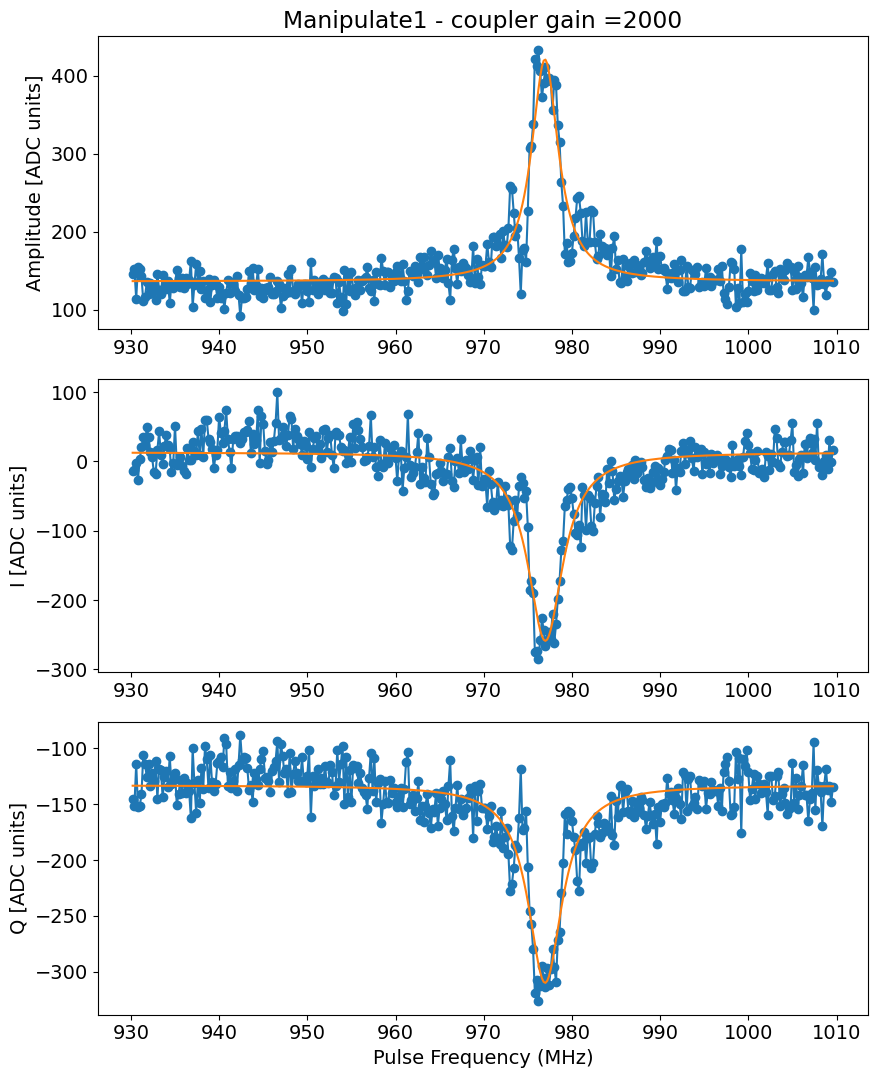

In [13]:
temp_data, attrs = prev_data(expt_path, '00000_FluxSpectroscopyF0g1Experiment.h5')
# temp_data, attrs = prev_data(expt_path, '00012_fluxspectroscopy_f0g1_dc_flux_sweep.h5')

qubit_spectroscopy_display(temp_data, title='Manipulate1 - coupler gain =' + str(attrs['config']['expt']['flux_drive'][2]), vlines=None)


In [336]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

In [332]:
f0g1_interp_func(0.58)

array(2013.46108006)

In [1051]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

In [268]:
f0g1_interp_func(0.576)

array(2013.3919327)

## Sweep

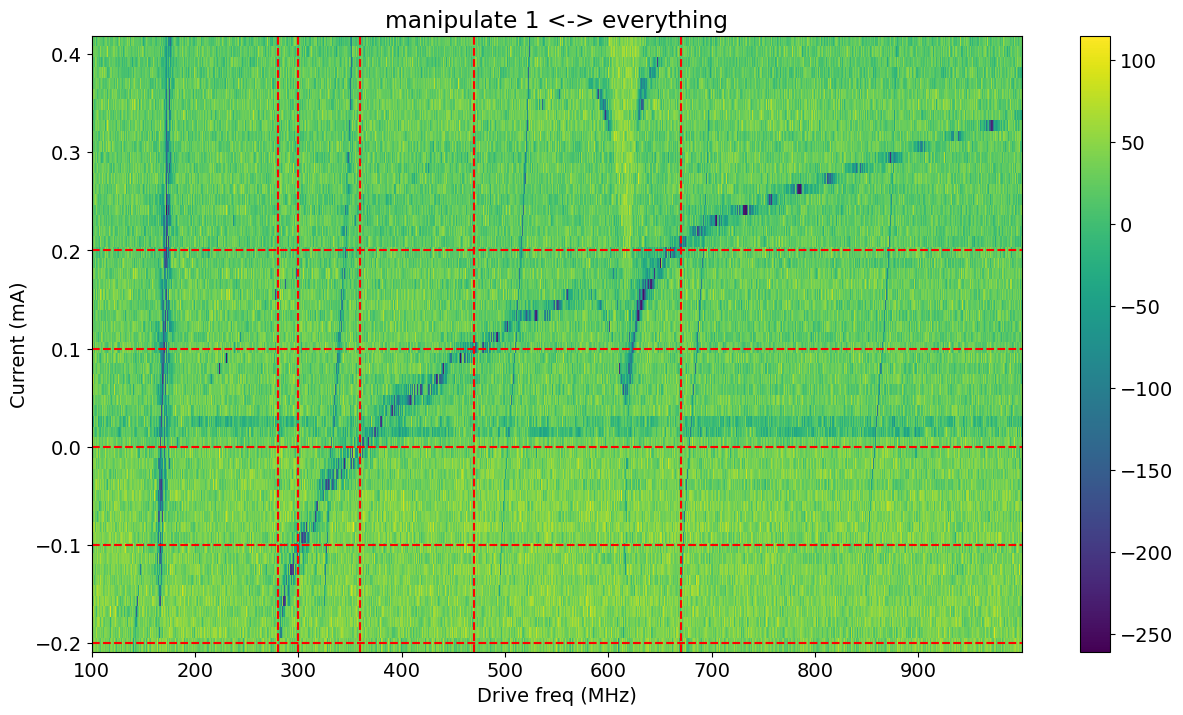

In [643]:
file_list = np.arange(7,67,1)
y_list = []
freq_list = []
name = '_fluxspectroscopy_f0g1_dc_flux_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try: 
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi']
        len_x = temp_data['xpts']
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['current'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_f0g1_sweep(len_x, freq_list, np.array(y_list), hlines=[-0.2, -0.1, 0, 0.1, 0.2], vlines=[280, 300, 360, 470, 670], title="manipulate 1 <-> everything")

C:\_Lib\python\multimode_expts\fit_display.py:1808: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.axhline(hline, color='r', ls='--')


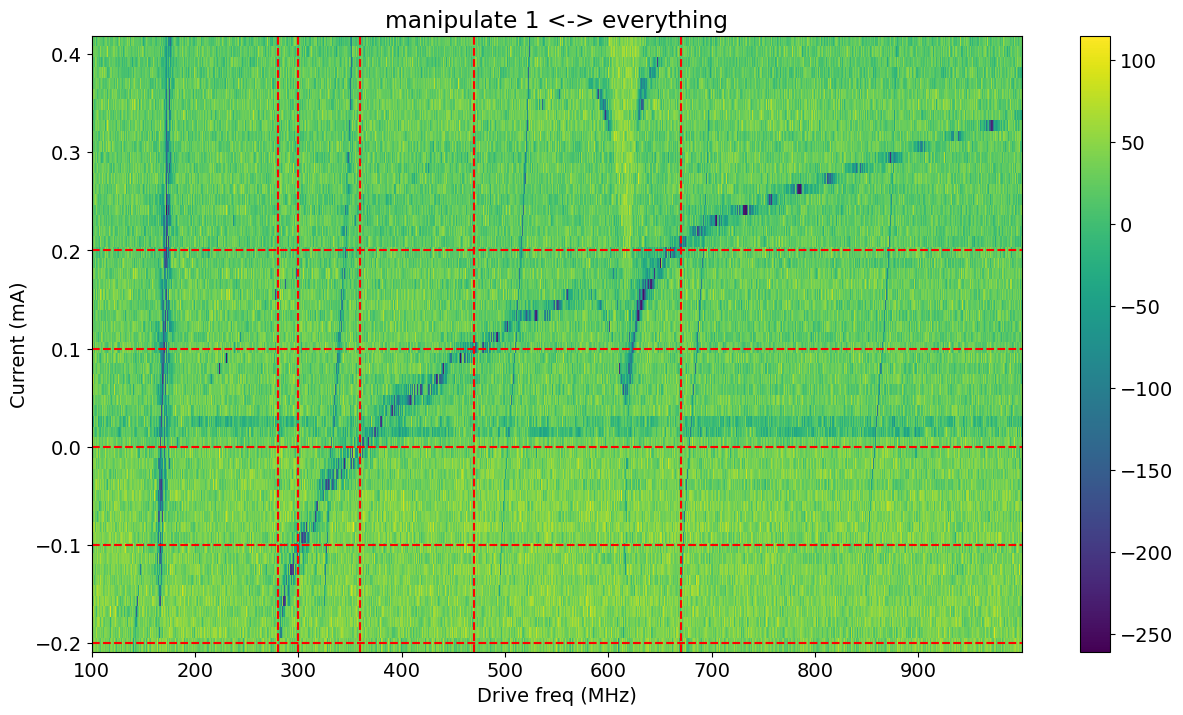

In [639]:

file_list = np.arange(7,67,1)
y_list = []
freq_list = []
name = '_fluxspectroscopy_f0g1_dc_flux_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try: 
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi']
        len_x = temp_data['xpts']
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['current'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_f0g1_sweep(len_x, freq_list, np.array(y_list), hlines=[-0.2, -0.1, 0, 0.1, 0.2], vlines=[280, 300, 360, 470, 670], title="manipulate 1 <-> everything")

In [646]:
np.array(y_list).shape

(60, 1800)

In [648]:
np.save('coupler1_x.npy', np.array(len_x))
np.save('coupler1_y.npy', np.array(y_list))
np.save('coupler1_z.npy', np.array(freq_list))

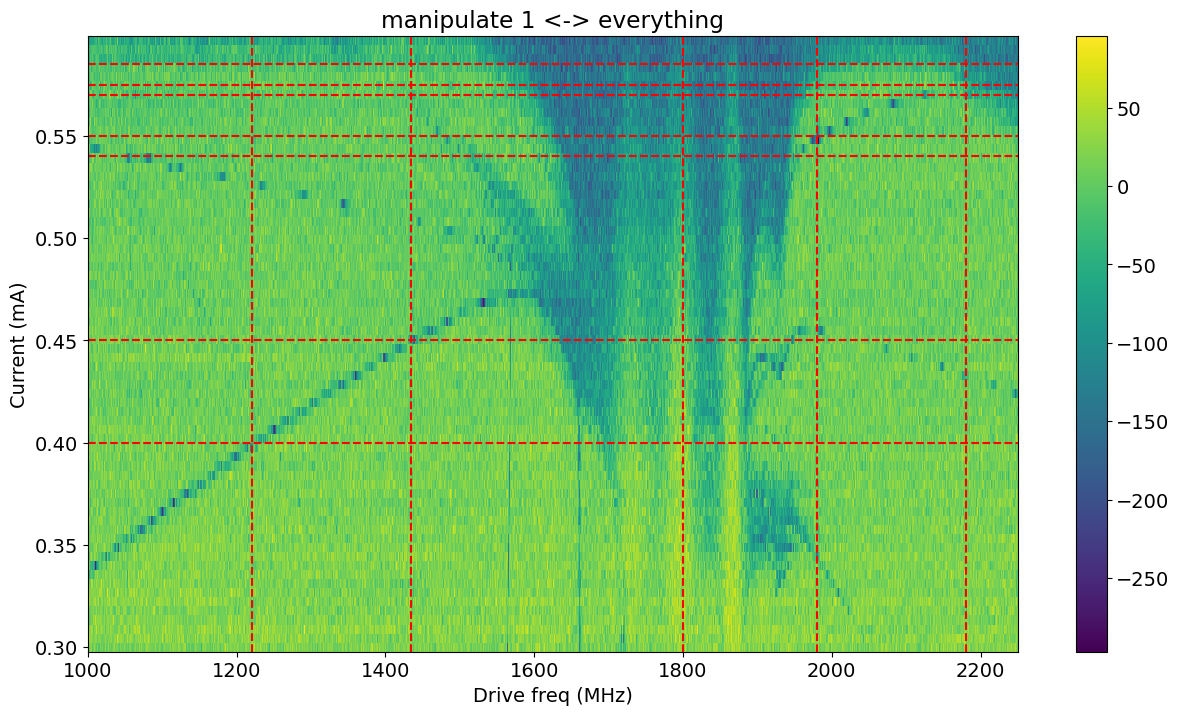

In [649]:
file_list = np.arange(67,135,1)
y_list = []
freq_list = []
name = '_fluxspectroscopy_f0g1_dc_flux_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try: 
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi']
        len_x = temp_data['xpts']
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['current'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_f0g1_sweep(len_x, freq_list, np.array(y_list), hlines=[0.4, 0.45, 0.55, 0.54, 0.57, 0.575, 0.585], vlines=[1220, 1435, 1980, 1800, 2180], title="manipulate 1 <-> everything")

In [650]:
np.save('coupler2_x.npy', np.array(len_x))
np.save('coupler2_y.npy', np.array(y_list))
np.save('coupler2_z.npy', np.array(freq_list))

Plotting mant1 as a func of dressed detuning

In [651]:
rough_currents = [0.33, 0.2,-0.2, -0.1, 0, 0.1, 0.4, 0.45, 0.55,]
rough_freqs = [971, 670, 280, 300, 360, 470, 1220, 1435, 1980]
# Combine the lists and sort by currents
combined = sorted(zip(rough_currents, rough_freqs))

# Unzip the combined list back into separate lists
rough_currents, rough_freqs = zip(*combined)

# Convert back to lists
rough_currents = list(rough_currents)
rough_freqs = list(rough_freqs)

# make a cubic spline interpolation
coupler_func = CubicSpline(rough_currents, rough_freqs)#, kind='linear', fill_value="extrapolate")

# raw data for t1 
DC_flux_list = [-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ]
data_file_list = [82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108,
                  110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
                  139, 142,145,148,151,154,157,160, 162]

# plot t1 data as a func of dressed detung 
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
man_freq_list = qubit_gf - np.array(f0g1_interp_func(DC_flux_list))
coupler_freq_list = coupler_func(DC_flux_list)

dressed_detung_list = man_freq_list - coupler_freq_list

# getting y data 
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue



In [656]:
np.save('freq_m1.npy',man_freq_list)

In [658]:
np.save('DC_flux_list.npy',DC_flux_list)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


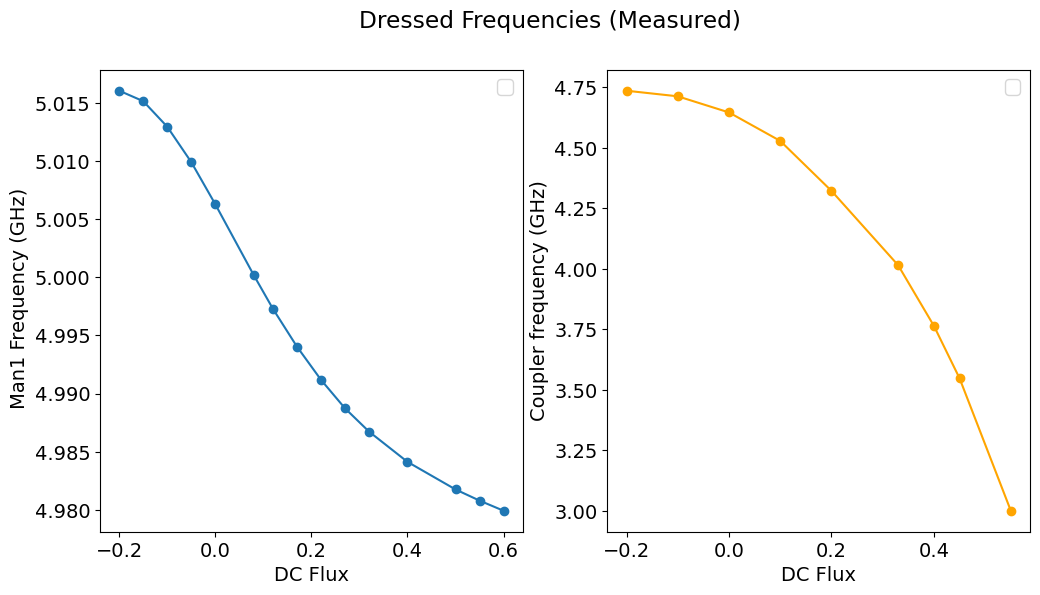

In [65]:
 #Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot f0g1_freqs vs DC_flux_list on the first axis
ax1.plot(df['currents'], (qubit_gf - df['f0g1_freqs']) * 1e-3, '-o')
ax1.set_xlabel('DC Flux')
ax1.set_ylabel(' Man1 Frequency (GHz)')
ax1.legend()

# Plot pi_lengths vs DC_flux_list on the second axis
ax2.plot(rough_currents, (qubit_gf - (f0g1_interp_func(rough_currents)) -rough_freqs) * 1e-3,'-o', color='orange')
ax2.set_xlabel('DC Flux')
ax2.set_ylabel('Coupler frequency (GHz)')
# ax2.set_title('pi_lengths vs DC Flux')
plt.suptitle('Dressed Frequencies (Measured)')
ax2.legend()
# plt.yscale('log')

Text(0.5, 1.0, 'Manipulate T1')

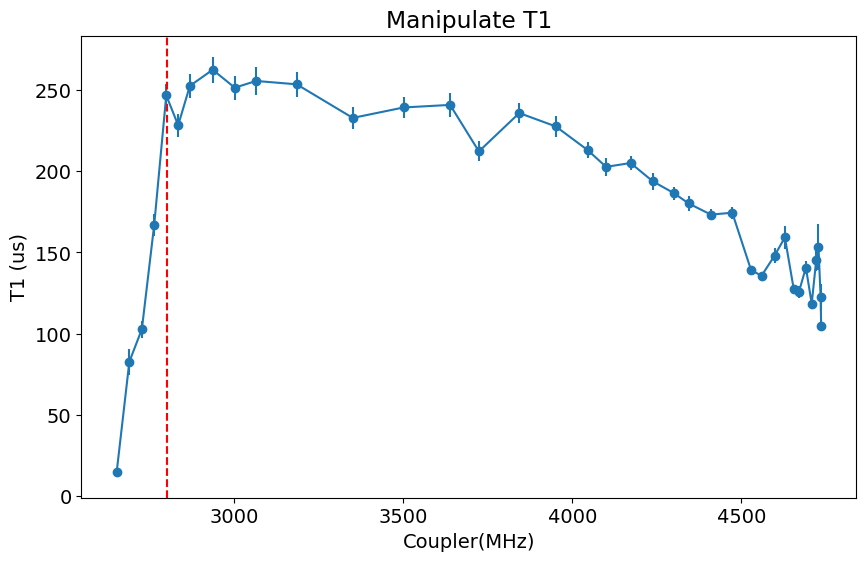

In [67]:
# plt.errorbar(DC_flux_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.errorbar((qubit_gf - (f0g1_interp_func(DC_flux_list)) -coupler_func(DC_flux_list)), T1_list, yerr=T1_err_list, fmt='o-')
plt.axvline(x=2800, color='r', linestyle='--')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Coupler(MHz)')
plt.ylabel('T1 (us)')
plt.title('Manipulate T1')


In [1161]:
coupler_func(0.5825)
f0g1_interp_func(0.57)

array(2013.28729505)

# Coupler T1

## Sideband General Sweep

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


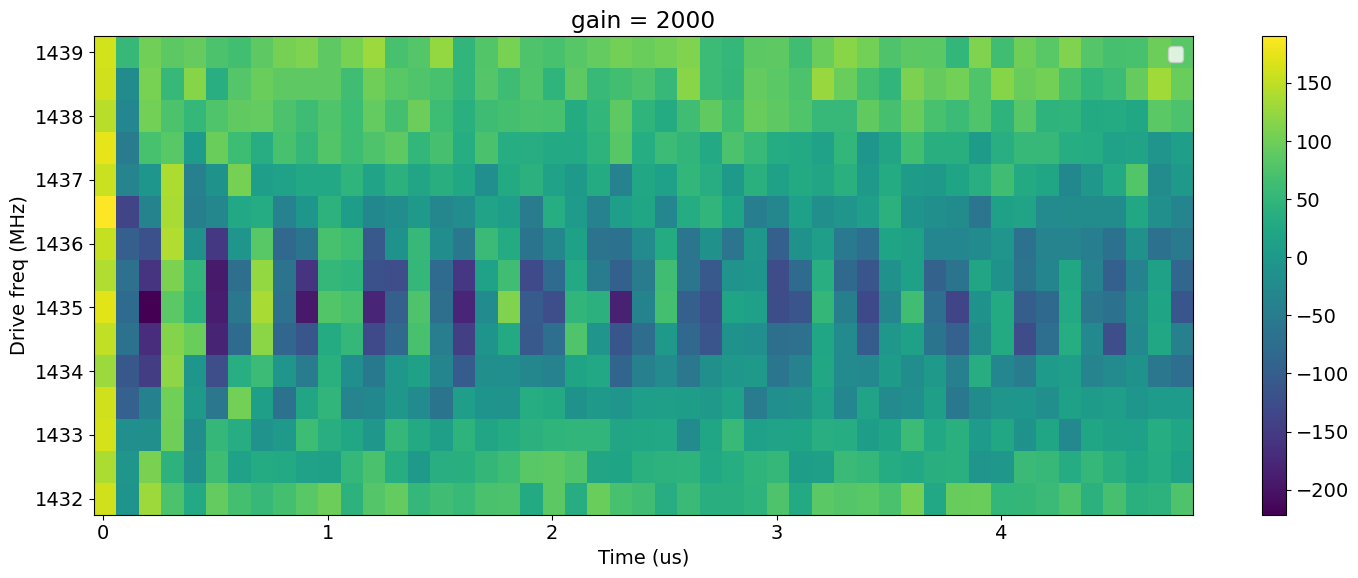

In [467]:

file_list = np.arange(875, 885, 1) # 0.571 ma
file_list = np.arange(904, 915, 1) # 0.572 ma
# file_list = np.arange(930, 945, 1) # 0.565 ma
file_list = np.arange(961, 969, 1) # 0.585 ma
file_list = np.arange(989, 1010, 1) # 0.585 ma   (969, 975 - 5000gain)
file_list = np.arange(1001, 1007, 1) # coupler drive off 
file_list = np.arange(1049, 1075, 1) # np.arange(1031, 1048, 1) #np.arange(1019, 1027, 1) #np.arange(1007, 1019, 1) # 0.58 ma
# file_list = np.arange(1115, 1150, 1)#np.arange(1107, 1114,1 )#np.arange(1095, 1107, 1)#np.arange(1076, 1095,1 )#file_list = np.arange(1060, 1076, 1) # 0.575
file_list = np.arange(1240, 1250,1 ) #np.arange(1226, 1240, 1)# file_list = np.arange(1204,1210,1) #np.arange(1193, 1220, 1) # 0.58
file_list = np.arange(1275, 1290, 1) # 0.45
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try:
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi'][0:-1]

        
        len_x = temp_data['xpts'][0:-1]
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['flux_drive'][1])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[], vlines=None, normalize = normalize, title="gain = " + str(attrs['config']['expt']['flux_drive'][2]))

In [362]:
len(len_x)

49

In [360]:
freq_list

[2170.0, 2171.5, 2173.0, 2174.5, 2176.0, 2177.5]

In [361]:
np.shape(y_list)

(42, 49)

In [1201]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

In [640]:
g = 80 
delta = 1300
alpha = 80 
(g/delta)**2 * alpha

0.30295857988165686

In [689]:
T1_meas = 100
T1_pure = 250
Tq = 50 
delta = 300

g = np.sqrt(Tq * ((1/T1_meas) - (1/T1_pure))) * delta
g

164.31676725154983

### Sideband General 

[227.39457689   2.85027588  93.16053717   3.44864267 -33.94715773
  -0.47248632]
Decay from avgi [us] 3.448642672581644
Rate [MHz] 2.8502758777103683
Pi length from avgi data [us]: 0.17234146839057687
	Pi/2 length from avgi data [us]: 0.08463066048070345
Fit params:  [227.39457689   2.85027588  93.16053717   3.44864267 -33.94715773
  -0.47248632]

Decay from avgq [us] 1.9590545191211164
Rate [MHz] 2.85143955078079
Pi length from avgq data [us]: 0.1718321861675831
Pi/2 length from avgq data [us]: 0.08591609308379156
Fit params:  [188.58375649   2.85143955  93.61112698   1.95905452 -87.03160842
  -0.473     ]


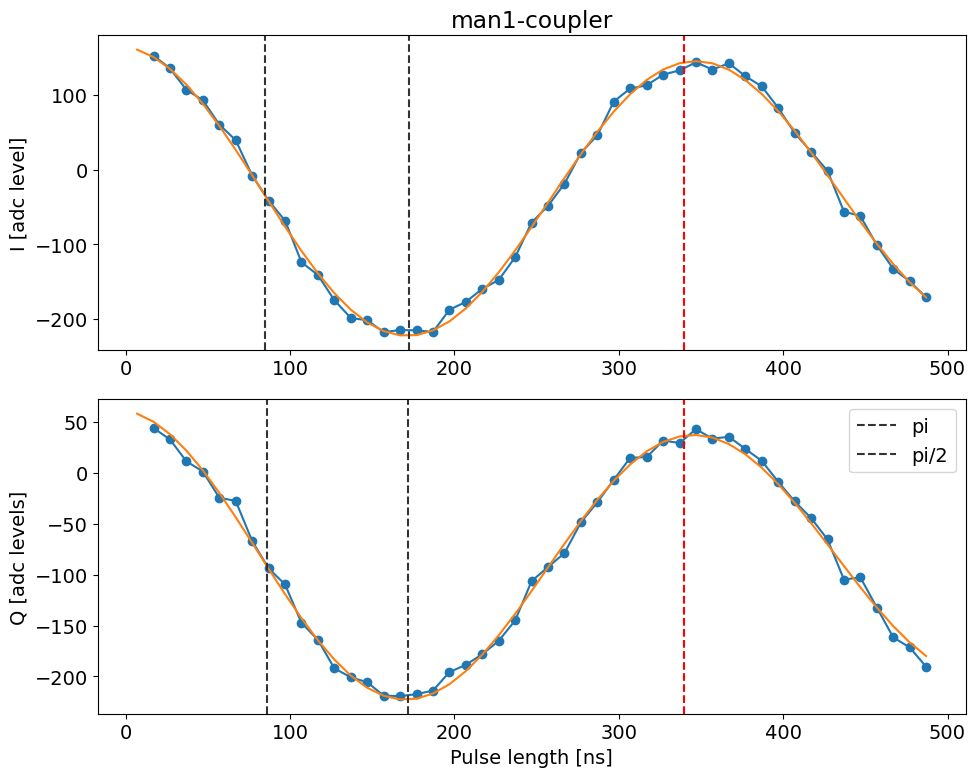

In [468]:

temp_data, attrs = prev_data(expt_path, '00017_SidebandGeneralExperiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None, None,None,None,None,None ],
                              vlines = [340],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='man1-coupler')

In [1000]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

### Coupler T1

Fit T1 avgi [us]: 29.011007562047343
Fit T1 avgq [us]: 28.81690427027548


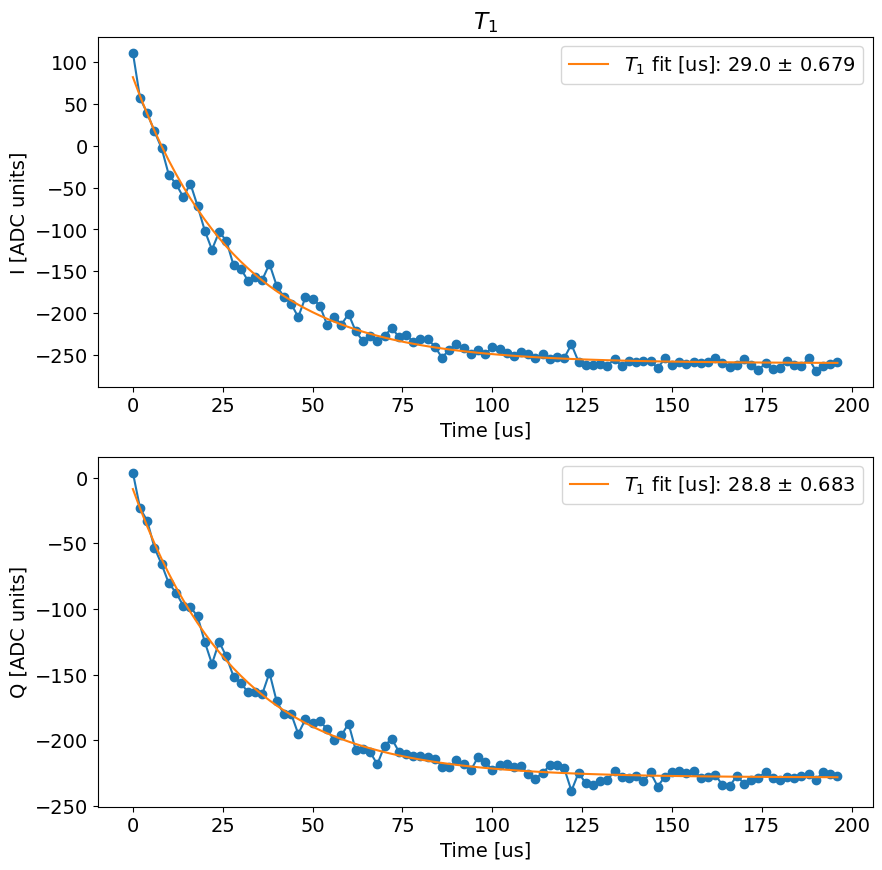

(28.81690427027548, 0.6832094167553298)

In [419]:

temp_data, attrs = prev_data(expt_path, '00014_SidebandT1GeneralExperiment.h5')
t1_display(data = temp_data, attrs = attrs, fit = True, active_reset = False)


#### Collecting T1 Data in dataframe

##### Make new Df

In [479]:
coup_t1_df = pd.DataFrame({'currents': {}, 'T1': {}, 'T1_err': {}, 'gain': {}, 'freq': {}, 'pi_length': {}, 'file_name': {}})
coup_t1_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


Empty DataFrame
Columns: [currents, T1, T1_err, gain, freq, pi_length, file_name]
Index: []

##### Add data to Df`

Fit T1 avgi [us]: 50.169594082310496
Fit T1 avgq [us]: 48.507968775534366


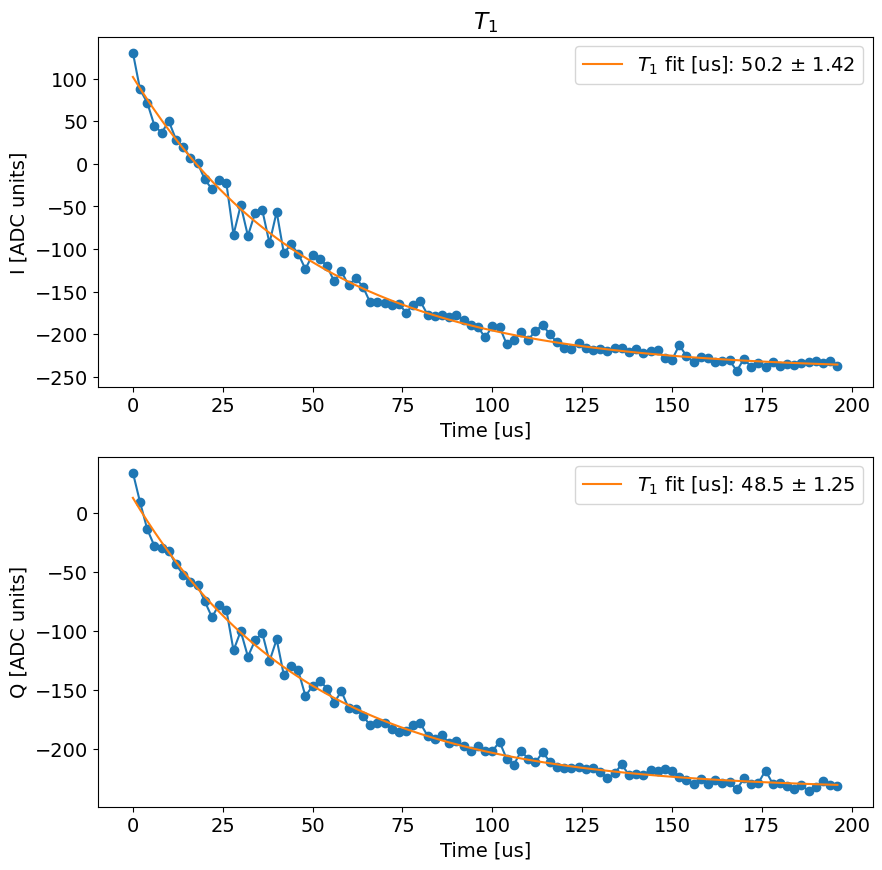

In [504]:
file_name = '00018_SidebandT1GeneralExperiment.h5'
temp_data, attrs = prev_data(expt_path, file_name)
t1, t1_err = t1_display(data = temp_data, attrs = attrs, fit = True, active_reset = False)

In [505]:
current = 0.45
T1 = t1
T1_err = t1_err
gain = attrs['config']['expt']['post_sweep_pulse'][1][0]
freq = attrs['config']['expt']['post_sweep_pulse'][0][0]
pi_length = attrs['config']['expt']['post_sweep_pulse'][2][0]
file_name = file_name

# Add data to the DataFrame
coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, pi_length, file_name]
coup_t1_df

currents         T1    T1_err  gain     freq  pi_length  \
0    -0.200  49.238800  0.845183  5000   283.25   0.708320   
1     0.080  39.578980  0.955975  2500   440.05   0.227493   
2     0.320  44.660608  1.115768  1000   944.25   0.316678   
3     0.570  34.422176  0.903962  5000  2133.00   0.132573   
4     0.560  17.721954  0.416043  2175  2037.25   0.192170   
5     0.571  37.036378  0.886530  5000  2142.00   0.137518   
6     0.565  28.816904  0.683209  3500  2073.50   0.160224   
7     0.576  16.632814  0.672637  2500  2155.00   0.284826   
8     0.580  12.426012  1.142225  1500  2182.00   0.362594   
9     0.450  48.507969  1.249782  2000  1435.00   0.172341   

                              file_name  
0  00001_SidebandT1GeneralExperiment.h5  
1  00002_SidebandT1GeneralExperiment.h5  
2  00004_SidebandT1GeneralExperiment.h5  
3  00008_SidebandT1GeneralExperiment.h5  
4  00011_SidebandT1GeneralExperiment.h5  
5  00013_SidebandT1GeneralExperiment.h5  
6  00014_SidebandT1GeneralExperiment.h5  
7  00015_SidebandT1GeneralExperiment.h5  
8  00016_SidebandT1GeneralExperiment.h5  
9  00018_SidebandT1GeneralExperiment.h5

In [595]:
coup_t1_df

currents         T1    T1_err  gain     freq  pi_length  \
0    -0.200  49.238800  0.845183  5000   283.25   0.708320   
1     0.080  39.578980  0.955975  2500   440.05   0.227493   
2     0.320  44.660608  1.115768  1000   944.25   0.316678   
3     0.570  34.422176  0.903962  5000  2133.00   0.132573   
4     0.560  17.721954  0.416043  2175  2037.25   0.192170   
5     0.571  37.036378  0.886530  5000  2142.00   0.137518   
6     0.565  28.816904  0.683209  3500  2073.50   0.160224   
7     0.576  16.632814  0.672637  2500  2155.00   0.284826   
8     0.580  12.426012  1.142225  1500  2182.00   0.362594   
9     0.450  48.507969  1.249782  2000  1435.00   0.172341   

                              file_name  
0  00001_SidebandT1GeneralExperiment.h5  
1  00002_SidebandT1GeneralExperiment.h5  
2  00004_SidebandT1GeneralExperiment.h5  
3  00008_SidebandT1GeneralExperiment.h5  
4  00011_SidebandT1GeneralExperiment.h5  
5  00013_SidebandT1GeneralExperiment.h5  
6  00014_SidebandT1GeneralExperiment.h5  
7  00015_SidebandT1GeneralExperiment.h5  
8  00016_SidebandT1GeneralExperiment.h5  
9  00018_SidebandT1GeneralExperiment.h5

##### Save Df

In [596]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'CouplerT1.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
coup_t1_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\CouplerT1.csv


In [458]:
# delete 6th row of df 
coup_t1_df = coup_t1_df.drop([6])

In [1005]:
10/((0.08/3)**2)

14062.499999999996

In [1006]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

#### Prepulse manipulation

In [390]:
f0g1_interp_func(0.45)

array(2010.88406296)

In [389]:
coupler_func(0.45)

array(1435.)

In [510]:
f0g1 = 2010.88406296
coup = 1435




f0g1_length = 0.607
coup_length = 0.17234146839057687
coup_gain = 2000

In [511]:
# for sideband/spec experiment 
from experiments.MM_base import *
basee = MM_base(yaml_cfg)
prepulse_str = [['qubit', 'ge', 'hpi',0], 
                 ['qubit',  'ef', 'pi', 0],
                ['man', 'M1', 'pi',  0],
                ]
post_pulse_str = [
                  ['man', 'M1', 'pi', 0],
                  ['qubit',  'ef', 'pi', 0],
                ['qubit', 'ge', 'hpi',0]
                ]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
pre_sweep_pulse[0][-1] = f0g1
# pre_sweep_pulse[0][-1] = coup
pre_sweep_pulse[2][-1] = f0g1_length
# pre_sweep_pulse[2][-1] = coup_length

# do same for postpulse 
post_sweep_pulse = post_creator.pulse.tolist()
# post_sweep_pulse[0][0] = coup
# post_sweep_pulse[2][0] = coup_length
post_sweep_pulse[0][0] = f0g1
post_sweep_pulse[2][0] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[3568.1751638611518, 3425.5564066067, 2010.88406296], [5510, 8236, 15000], [0, 0, 0.607], [0, 0, 0], [2, 2, 0], ['g', 'g', 'flat_top'], [0.035, 0.035, 0.005]]
post_sweep_pulse: [[2010.88406296, 3425.5564066067, 3568.1751638611518], [15000, 8236, 5510], [0.607, 0, 0], [0, 0, 0], [0, 2, 2], ['flat_top', 'g', 'g'], [0.005, 0.035, 0.035]]


In [512]:
coupler_func(0.56)

array(2045.12426456)

In [513]:
# for sideband t1 experiment
basee = MM_base(yaml_cfg)
prepulse_str = [['qubit', 'ge', 'pi',0], 
                 ['qubit',  'ef', 'pi', 0],
                ['man', 'M1', 'pi',  0],
                ['storage', 'M1-S5', 'pi', 0 ]]
post_pulse_str = [['storage', 'M1-S5', 'pi', 0], 
                  ['man', 'M1', 'pi', 0]]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
pre_sweep_pulse[0][-2] = f0g1
pre_sweep_pulse[0][-1] = coup
pre_sweep_pulse[2][-2] = f0g1_length
pre_sweep_pulse[2][-1] = coup_length
pre_sweep_pulse[1][-1] = coup_gain

# do same for postpulse 
post_sweep_pulse = post_creator.pulse.tolist()
post_sweep_pulse[0][0] = coup
post_sweep_pulse[2][0] = coup_length
post_sweep_pulse[1][0] = coup_gain
post_sweep_pulse[0][1] = f0g1
post_sweep_pulse[2][1] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[3568.1751638611518, 3425.5564066067, 2010.88406296, 1435], [10716, 8236, 15000, 2000], [0, 0, 0.607, 0.17234146839057687], [0, 0, 0, 0], [2, 2, 0, 3], ['g', 'g', 'flat_top', 'flat_top'], [0.035, 0.035, 0.005, 0.005]]
post_sweep_pulse: [[1435, 2010.88406296], [2000, 15000], [0.17234146839057687, 0.607], [0, 0], [3, 0], ['flat_top', 'flat_top'], [0.005, 0.005]]


In [514]:
# for ramsey experiment
basee = MM_base(yaml_cfg)
prepulse_str = [
                ['storage', 'M1-S5', 'pi', 0 ]]
post_pulse_str = [['storage', 'M1-S5', 'pi', 0], 
                  ]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
# pre_sweep_pulse[0][-2] = f0g1
pre_sweep_pulse[0][-1] = coup
# pre_sweep_pulse[2][-2] = f0g1_length
pre_sweep_pulse[2][-1] = coup_length
pre_sweep_pulse[1][-1] = coup_gain

# do same for postpulse 
# post_sweep_pulse = post_creator.pulse.tolist()
# post_sweep_pulse[0][0] = coup
# post_sweep_pulse[2][0] = coup_length
# post_sweep_pulse[1][0] = coup_gain
# post_sweep_pulse[0][1] = f0g1
# post_sweep_pulse[2][1] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
# print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[1435], [2000], [0.17234146839057687], [0], [3], ['flat_top'], [0.005]]


In [504]:
creator.pulse.tolist()

[[3568.1751638611518, 3425.5564066067, 2007.06, 349.415],
 [10716, 8236, 15000, 3000],
 [0, 0, 0.651287, 0.9771428571428572],
 [0, 0, 0, 0],
 [2, 2, 0, 1],
 ['g', 'g', 'flat_top', 'flat_top'],
 [0.035, 0.035, 0.005, 0.005]]

In [501]:
yaml_cfg

{'prepulse_qubit': {'freq': [3568.1751638611518],
  'length': [0.06],
  'gain': [30],
  'phase': [0],
  'repeat_time': 10},
 'device': {'qubit': {'T1': [127.0],
   'f_ge': [3568.1751638611518],
   'f_ge_resolved': [3568.1751638611518],
   'f_ge_idle': [3568.1751638611518],
   'f_ef': [3425.5564066067],
   'f_ef_idle': [3425.5564066067],
   'ramp_sigma': [0.005],
   'ramp_sigma_num': [3],
   'pulses': {'pi_ge': {'gain': [10716],
     'sigma': [0.035],
     'length': [0],
     'type': 'gauss'},
    'pi_ge_ftop': {'gain': [3000],
     'sigma': [0.005],
     'length': [0.190914187445986],
     'type': 'flat_top'},
    'pi_ge_fast': {'gain': [10682],
     'sigma': [0.035],
     'length': [0],
     'type': 'gauss'},
    'pi_ge_resolved': {'gain': [50],
     'sigma': [0.005],
     'length': [6.553697146578866],
     'type': 'flat_top',
     'repeat_no': 1},
    'hpi_ge': {'gain': [5510],
     'length': [0],
     'sigma': [0.035],
     'type': 'gauss'},
    'hpi_ge_ftop': {'gain': [3000],
    

# Coupler T2

No echoes in the data
Attempted to init fitparam 1 to 124.57912457912461, which is out of bounds 0.34013605442176875 to 51.02040816326531. Instead init to 25.68027210884354
Current pi pulse frequency: 2006.72
Fit frequency from I [MHz]: 17.819498165176128 +/- 0.03735164747932818
Suggested new pi pulse frequency from fit I [MHz]:
 	2008.900501834824
 	2044.5394981651762
T2 Ramsey from fit I [us]: 0.3866780282174555
Fit frequency from Q [MHz]: 18.242476441315727 +/- 0.5466455048443452
Suggested new pi pulse frequencies from fit Q [MHz]:
 	2008.4775235586842
 	2044.9624764413159
T2 Ramsey from fit Q [us]: 0.24556630085866016


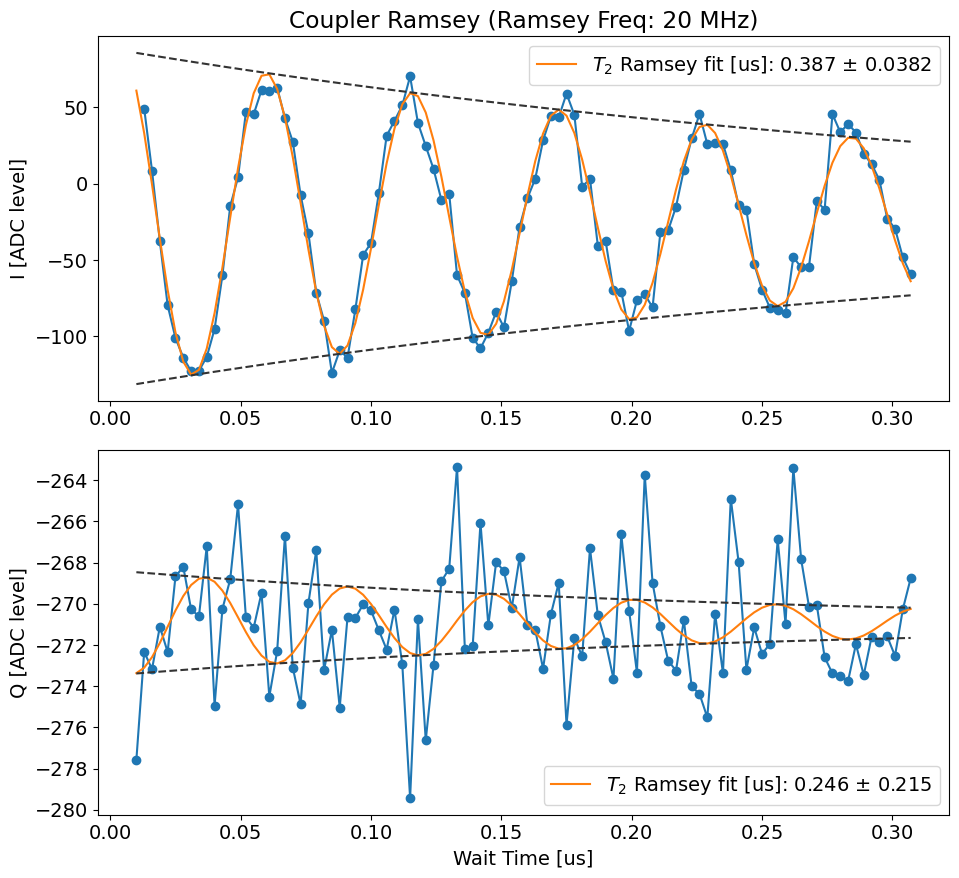

(array([ 1.51236407e+02,  1.78194982e+01,  6.52992426e+01,  3.86678028e-01,
        -2.28056316e+01, -1.18946671e-01]),
 array([[ 1.11913373e+17, -9.43554805e+05,  3.71755446e+07,
          9.79586591e+04, -1.50936375e+07, -2.86137737e+14],
        [-9.43554805e+05,  1.39514557e-03, -6.07629503e-02,
         -3.53826941e-05,  1.87969853e-04,  2.41246093e+03],
        [ 3.71755446e+07, -6.07629503e-02,  3.88367942e+00,
          1.05408062e-03,  6.97505660e-02, -9.50496445e+04],
        [ 9.79586591e+04, -3.53826941e-05,  1.05408062e-03,
          1.45739043e-03, -3.64991968e-03, -2.50459545e+02],
        [-1.50936375e+07,  1.87969853e-04,  6.97505660e-02,
         -3.64991968e-03,  1.17259387e+00,  3.85910947e+04],
        [-2.86137737e+14,  2.41246093e+03, -9.50496445e+04,
         -2.50459545e+02,  3.85910947e+04,  7.31590897e+11]]),
 array([0.013, 0.016, 0.019, 0.022, 0.025, 0.028, 0.031, 0.034, 0.037,
        0.04 , 0.043, 0.046, 0.049, 0.052, 0.055, 0.058, 0.061, 0.064,
        0.

In [668]:
temp_data, attrs = prev_data(expt_path, '00022_CavityRamseyExperiment.h5')
# temp_data, attrs = prev_data(expt_path, '00207_CavityRamseyExperiment.h5')
Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Coupler Ramsey')

In [670]:
attrs['config']['expt']

{'start': 0.01,
 'step': 0.003,
 'expts': 101,
 'ramsey_freq': 20,
 'reps': 500,
 'rounds': 1,
 'qubits': [0],
 'checkEF': False,
 'f0g1_cavity': 0,
 'init_gf': False,
 'active_reset': False,
 'man_reset': True,
 'storage_reset': True,
 'user_defined_pulse': [False, 2006.72, 15000, 0.005, 0.6168960348389007, 5],
 'parity_meas': False,
 'man_idx': 1,
 'storage_ramsey': [False, 1, False],
 'coupler_ramsey': True,
 'custom_coupler_pulse': [[944.25],
  [1000],
  [0.316677658],
  [0],
  [1],
  ['flat_top'],
  [0.005]],
 'prepulse': True,
 'postpulse': True,
 'pre_sweep_pulse': [[3568.1751638611518, 3425.5564066067, 2007.0],
  [5510, 8236, 15000],
  [0, 0, 0.604689],
  [0, 0, 0],
  [2, 2, 0],
  ['g', 'g', 'flat_top'],
  [0.035, 0.035, 0.005]],
 'post_sweep_pulse': [[2007.0, 3425.5564066067, 3568.1751638611518],
  [15000, 8236, 5510],
  [0.604689, 0, 0],
  [0, 0, 0],
  [0, 2, 2],
  ['flat_top', 'g', 'g'],
  [0.005, 0.035, 0.035]]}

#### Collecting T2 Data in dataframe

##### Make new Df

In [549]:
coup_t2_df = pd.DataFrame({'currents': {}, 'T2': {}, 'T2_err': {}, 'gain': {}, 'freq': {}, 'pi_length': {}, 'file_name': {}})
coup_t2_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


Empty DataFrame
Columns: [currents, T2, T2_err, gain, freq, pi_length, file_name]
Index: []

##### Add data to Df`

Current pi pulse frequency: 2006.72
Fit frequency from I [MHz]: 6.14136156630411 +/- 0.0062908258856953295
Suggested new pi pulse frequency from fit I [MHz]:
 	2008.8613615663041
 	1996.578638433696
T2 Ramsey from fit I [us]: 1.1294182237408341
Fit frequency from Q [MHz]: 15.224690345055327 +/- 0.3026394026899635
Suggested new pi pulse frequencies from fit Q [MHz]:
 	2017.9446903450553
 	1987.4953096549448
T2 Ramsey from fit Q [us]: 0.5456443089083108


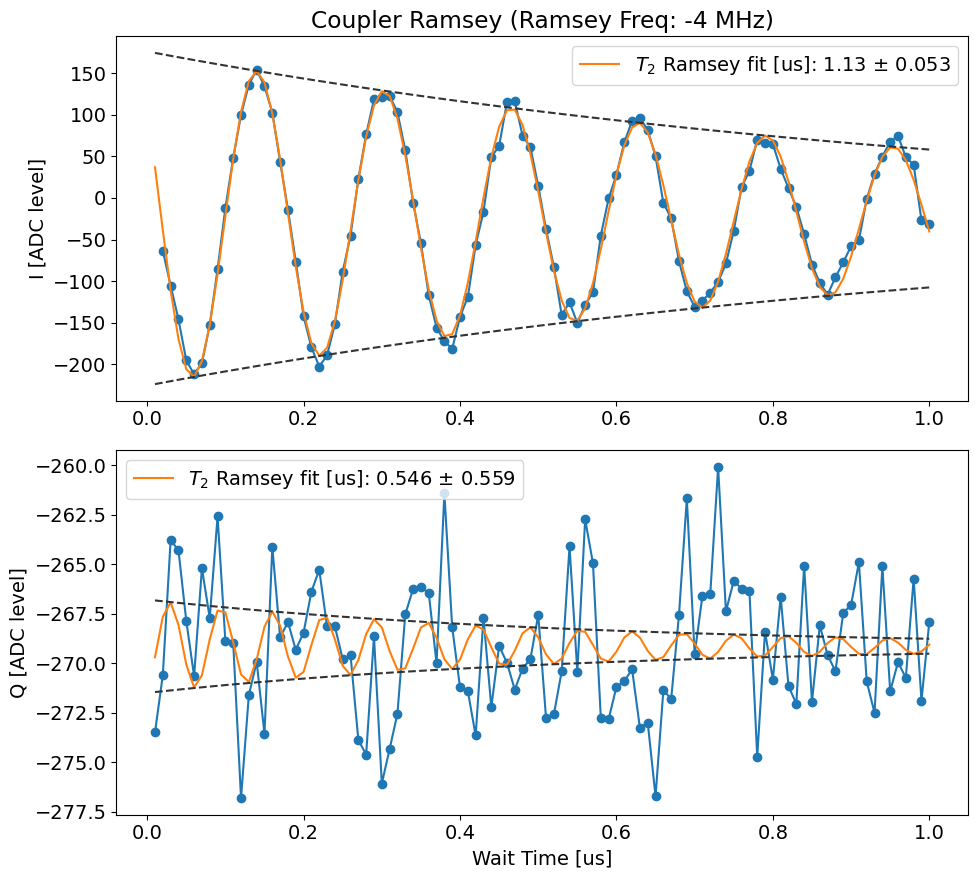

In [561]:
file_name = '00014_CavityRamseyExperiment.h5'
temp_data, attrs = prev_data(expt_path, file_name)
t2, t2_err = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Coupler Ramsey')

In [562]:
current = 0.08
T2 = t2
T2_err = t2_err
gain = attrs['config']['expt']['custom_coupler_pulse'][1][0]
freq = attrs['config']['expt']['custom_coupler_pulse'][0][0]
pi_length = attrs['config']['expt']['custom_coupler_pulse'][2][0]
file_name = file_name

# Add data to the DataFrame
coup_t2_df.loc[len(coup_t2_df)] = [current, T2, T2_err, gain, freq, pi_length, file_name]
coup_t2_df

currents         T2    T2_err  gain     freq  pi_length  \
0     0.560   0.113744  0.013517  2175  2037.35   0.193027   
1     0.565   0.118128  0.016479  3500  2073.50   0.137573   
2     0.320   0.386678  0.038176  1000   944.25   0.316678   
3     0.450   0.220114  0.013733  2000  1435.00   0.172341   
4    -0.200  48.307903  2.454736  5000   283.25   0.708320   
5     0.080   1.129418  0.053034  2500   440.05   0.227493   

                         file_name  
0  00026_CavityRamseyExperiment.h5  
1  00038_CavityRamseyExperiment.h5  
2  00022_CavityRamseyExperiment.h5  
3  00089_CavityRamseyExperiment.h5  
4  00008_CavityRamseyExperiment.h5  
5  00014_CavityRamseyExperiment.h5

##### Save Df

In [597]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'CouplerT2.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
coup_t2_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\CouplerT2.csv


In [598]:
# drop a row 
coup_t2_df 

currents         T2    T2_err  gain     freq  pi_length  \
0     0.560   0.113744  0.013517  2175  2037.35   0.193027   
1     0.565   0.118128  0.016479  3500  2073.50   0.137573   
2     0.320   0.386678  0.038176  1000   944.25   0.316678   
3     0.450   0.220114  0.013733  2000  1435.00   0.172341   
4    -0.200  48.307903  2.454736  5000   283.25   0.708320   
5     0.080   1.129418  0.053034  2500   440.05   0.227493   

                         file_name  
0  00026_CavityRamseyExperiment.h5  
1  00038_CavityRamseyExperiment.h5  
2  00022_CavityRamseyExperiment.h5  
3  00089_CavityRamseyExperiment.h5  
4  00008_CavityRamseyExperiment.h5  
5  00014_CavityRamseyExperiment.h5

# Cavity T2

Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.06336200470344713 +/- 5.011000046698238e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	1980.2066379952967
 	1980.3333620047035
T2 Ramsey from fit I [us]: 172.9845114304988
Fit frequency from Q [MHz]: 0.016181590033328523 +/- 0.006735238612292506
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1980.2538184099667
 	1980.2861815900333
T2 Ramsey from fit Q [us]: 29.400000000346978


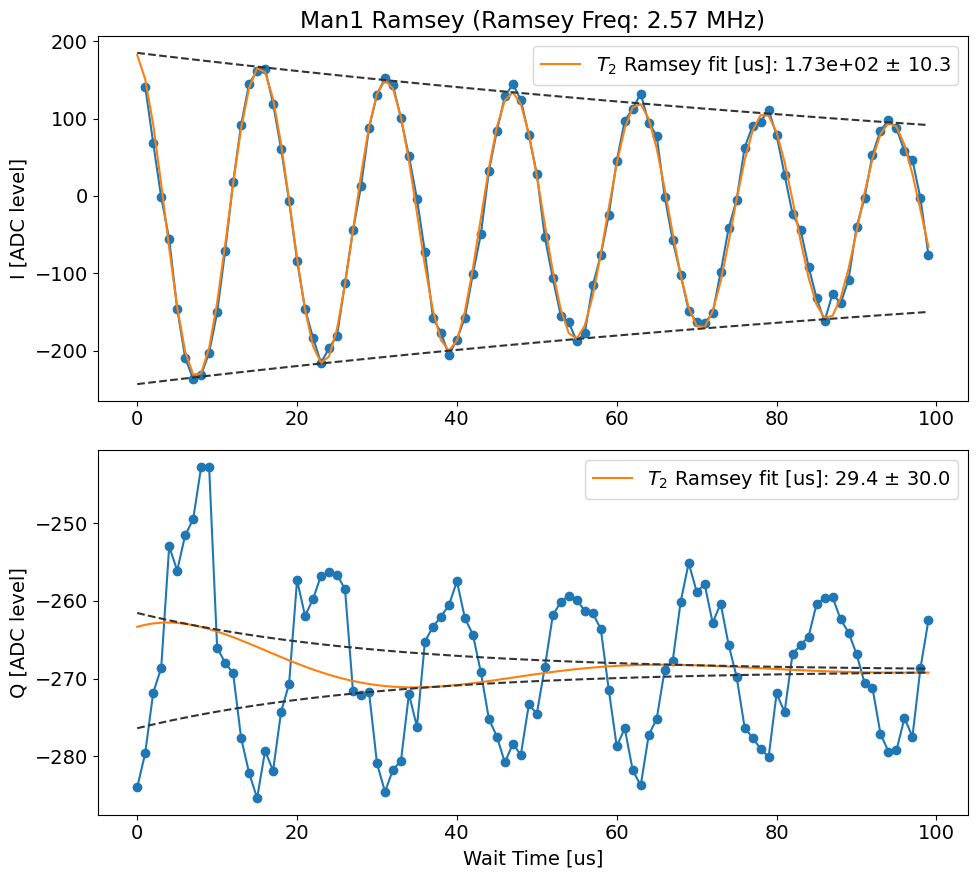

In [207]:
temp_data, attrs = prev_data(expt_path, '00052_CavityRamseyExperiment.h5')# 0.57 ma
# temp_data, attrs = prev_data(expt_path, '00056_CavityRamseyExperiment.h5')# 0.6ma
# temp_data, attrs = prev_data(expt_path, '00063_CavityRamseyExperiment.h5')# 0.585 ma
temp_data, attrs = prev_data(expt_path, '00066_CavityRamseyExperiment.h5')# 0.50 ma
temp_data, attrs = prev_data(expt_path, '00071_CavityRamseyExperiment.h5')# 0.40 ma
temp_data, attrs = prev_data(expt_path, '00074_CavityRamseyExperiment.h5')# 0.30 ma
temp_data, attrs = prev_data(expt_path, '00077_CavityRamseyExperiment.h5')# 0.12 ma
temp_data, attrs = prev_data(expt_path, '00080_CavityRamseyExperiment.h5')# -0.05 ma
temp_data, attrs = prev_data(expt_path, '00086_CavityRamseyExperiment.h5')# -0.2 ma
# temp_data, attrs = prev_data(expt_path, '00207_CavityRamseyExperiment.h5')
Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Man1 Ramsey')

##### Make new Df

In [569]:
man_t2_df = pd.DataFrame({'currents': {}, 'T2': {}, 'T2_err': {}, 'file_name': {}})
man_t2_df

# current = 0.58
# T1 = 100
# T1_err = 10
# gain = 5000
# freq = 1000
# file_name = '00016_SidebandT1GeneralExperiment.h5'

# # Add data to the DataFrame
# coup_t1_df.loc[len(coup_t1_df)] = [current, T1, T1_err, gain, freq, file_name]

# # Display the updated DataFrame
# coup_t1_df


Empty DataFrame
Columns: [currents, T2, T2_err, file_name]
Index: []

##### Add data to Df`

Current pi pulse frequency: 1977.7
Fit frequency from I [MHz]: 0.06336200470344713 +/- 5.011000046698238e-05
Suggested new pi pulse frequency from fit I [MHz]:
 	1980.2066379952967
 	1980.3333620047035
T2 Ramsey from fit I [us]: 172.9845114304988
Fit frequency from Q [MHz]: 0.016181590033328523 +/- 0.006735238612292506
Suggested new pi pulse frequencies from fit Q [MHz]:
 	1980.2538184099667
 	1980.2861815900333
T2 Ramsey from fit Q [us]: 29.400000000346978


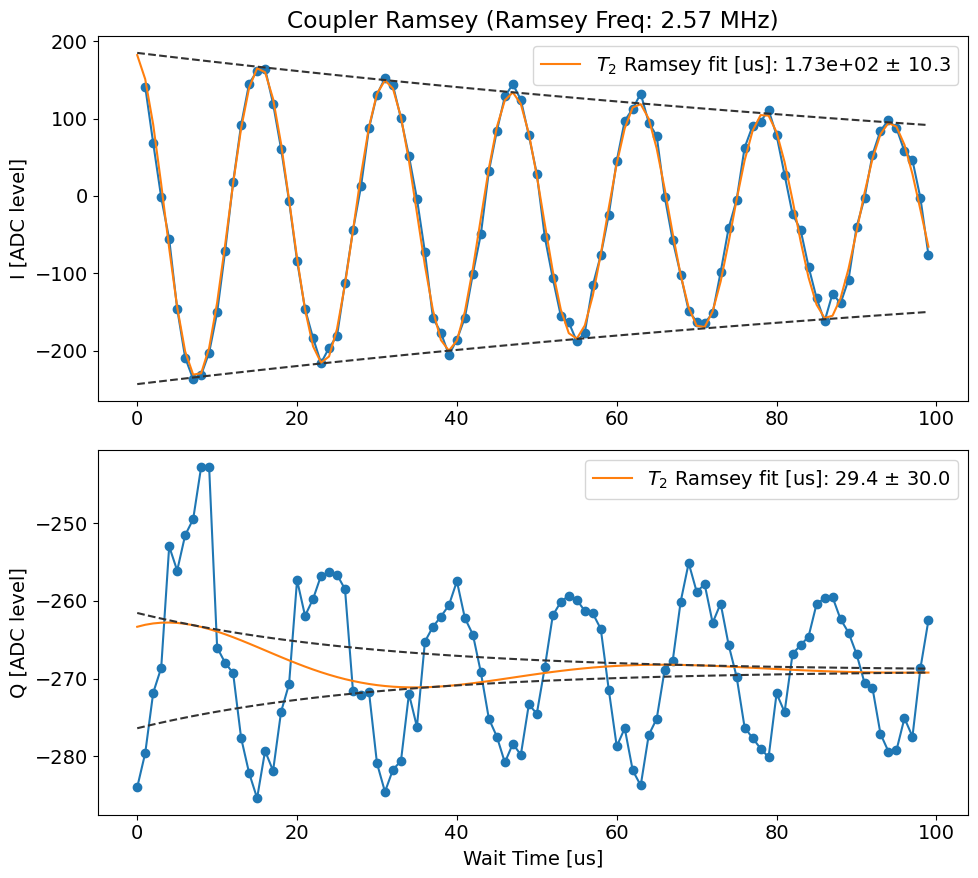

In [584]:
file_name = '00086_CavityRamseyExperiment.h5'
temp_data, attrs = prev_data(expt_path, file_name)
t2, t2_err = Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Coupler Ramsey')

In [585]:
current = -0.2
T2 = t2
T2_err = t2_err
file_name = file_name

# Add data to the DataFrame
man_t2_df.loc[len(man_t2_df)] = [current, T2, T2_err, file_name]
man_t2_df

currents          T2     T2_err                        file_name
0     0.585   19.239746   1.421020  00063_CavityRamseyExperiment.h5
1     0.570  147.477509   7.386751  00052_CavityRamseyExperiment.h5
2     0.500  108.851901   4.610384  00066_CavityRamseyExperiment.h5
3     0.400   75.810401   3.331322  00071_CavityRamseyExperiment.h5
4     0.300   71.144428   3.546478  00074_CavityRamseyExperiment.h5
5     0.120   36.094442   1.599409  00077_CavityRamseyExperiment.h5
6    -0.050   36.087576   2.162266  00080_CavityRamseyExperiment.h5
7    -0.200  172.984511  10.261186  00086_CavityRamseyExperiment.h5

##### Save Df

In [599]:
# save in dataframe 
# Assuming df is your DataFrame and parent_path is defined
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
file_name = 'ManT2.csv'
file_path = os.path.join(folder, file_name)

# Ensure the directory exists
os.makedirs(folder, exist_ok=True)

# Save the DataFrame to a CSV file
man_t2_df.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\ManT2.csv


# Plot Coherences

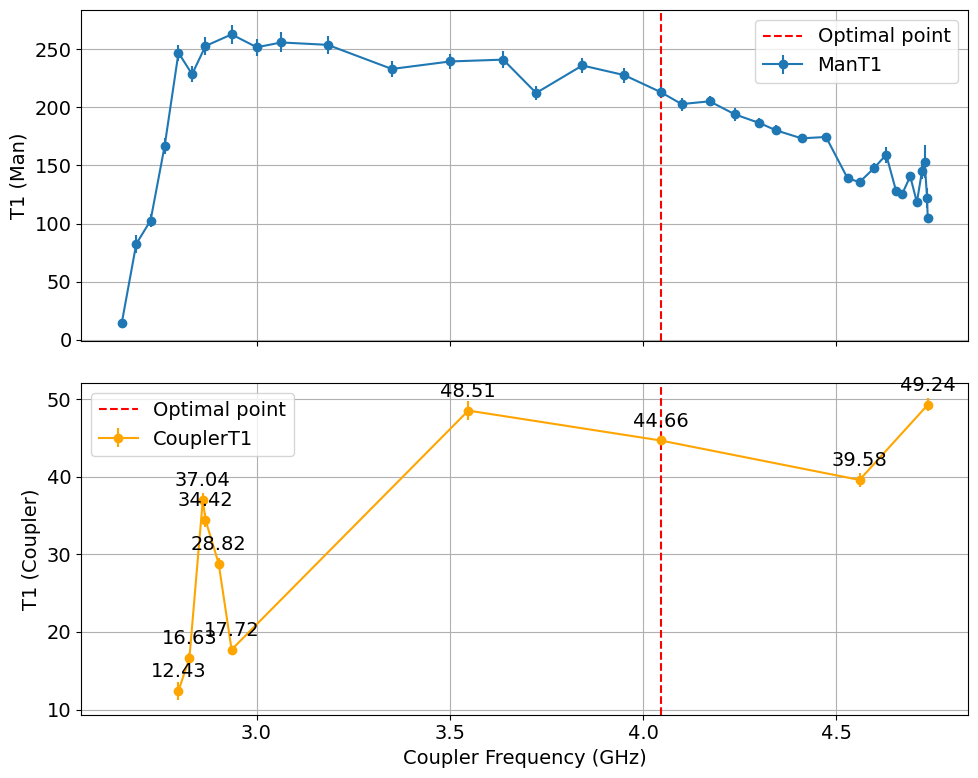

In [630]:
man_t1_df_name = 'ManT1.csv'
coupler_t1_df_name = 'CouplerT1.csv'

# Load the DataFrames from the CSV files
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
man_t1_df = pd.read_csv(os.path.join(folder, man_t1_df_name))
coupler_t1_df = pd.read_csv(os.path.join(folder, coupler_t1_df_name))

x1 = man_t1_df['currents']
y1 = man_t1_df['T1']
y1_errs = man_t1_df['T1_err']

# Get the indices that would sort x1
sorted_indices = np.argsort(x1)

# Apply the sorted indices to x1, y1, and y1_errs
x1_sorted = x1.iloc[sorted_indices].reset_index(drop=True)
y1_sorted = y1.iloc[sorted_indices].reset_index(drop=True)
y1_errs_sorted = y1_errs.iloc[sorted_indices].reset_index(drop=True)

# do the same for x2 
x2 = coupler_t1_df['currents']
y2 = coupler_t1_df['T1']
y2_errs = coupler_t1_df['T1_err']

# Get the indices that would sort x2
sorted_indices = np.argsort(x2)

# Apply the sorted indices to x2, y2, and y2_errs
x2_sorted = x2.iloc[sorted_indices].reset_index(drop=True)
y2_sorted = y2.iloc[sorted_indices].reset_index(drop=True)
y2_errs_sorted = y2_errs.iloc[sorted_indices].reset_index(drop=True)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot data for man_t1_df
x1_new = qubit_gf - np.array(f0g1_interp_func(x1_sorted)) - coupler_func(x1_sorted)
ax1.errorbar(x1_new*1e-3, y1_sorted, yerr=y1_errs_sorted, fmt='o-', label='ManT1')
ax1.set_ylabel('T1 (Man)')
ax1.legend()
ax1.grid(True)

# Plot data for coupler_t1_df
x2_new = qubit_gf - np.array(f0g1_interp_func(x2_sorted)) - coupler_func(x2_sorted)
ax2.errorbar(x2_new * 1e-3, y2_sorted, yerr=y2_errs_sorted, fmt='o-', label='CouplerT1', color='orange')
ax2.set_xlabel('Coupler Frequency (GHz)')
ax2.set_ylabel('T1 (Coupler)')
ax2.legend()
ax2.grid(True)

# Annotate points in the second subplot
for i, txt in enumerate(y2_sorted):
    ax2.annotate(f'{txt:.2f}', (x2_new[i]*1e-3, y2_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center')


# Add vertical line at current 0.32
current = 0.32
x = qubit_gf - np.array(f0g1_interp_func(current)) - coupler_func(current)
ax2.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.legend()
ax2.legend()


# Display the plots
plt.tight_layout()
plt.show()




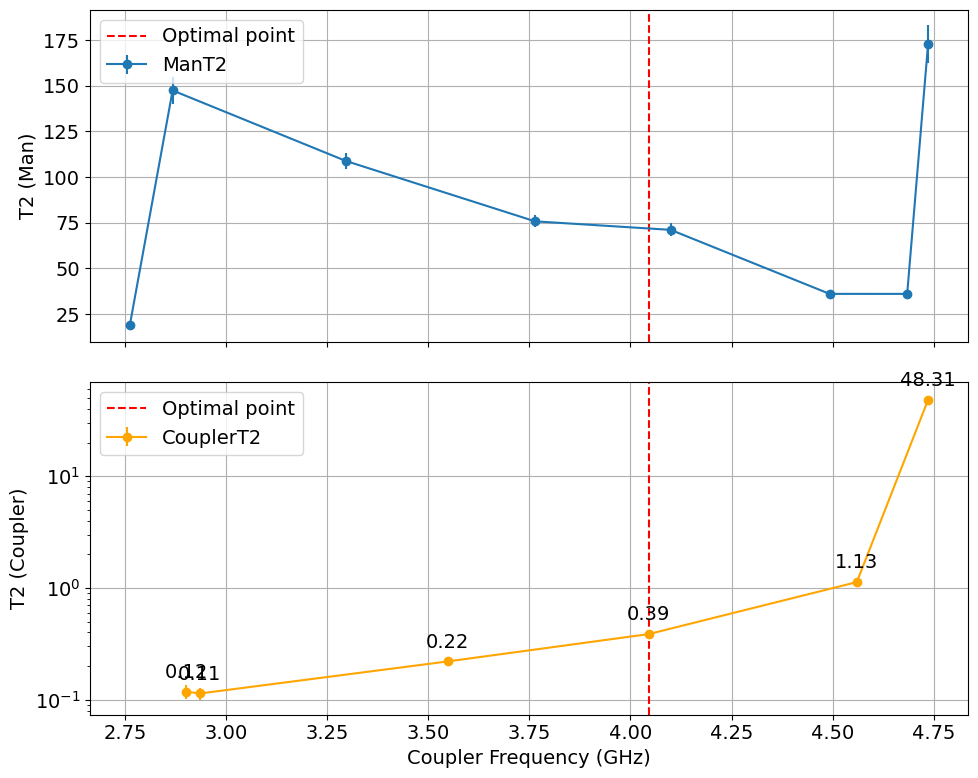

In [631]:
man_t1_df_name = 'ManT2.csv'
coupler_t1_df_name = 'CouplerT2.csv'

# Load the DataFrames from the CSV files
folder = os.path.join(data_parent_path, 'RAM_paper_results', 'datasets')
man_t1_df = pd.read_csv(os.path.join(folder, man_t1_df_name))
coupler_t1_df = pd.read_csv(os.path.join(folder, coupler_t1_df_name))

x1 = man_t1_df['currents']
# x1 = qubit_gf - np.array(f0g1_interp_func(x1)) - coupler_func(x1)
y1 = man_t1_df['T2']
y1_errs = man_t1_df['T2_err']

# Get the indices that would sort x1
sorted_indices = np.argsort(x1)

# Apply the sorted indices to x1, y1, and y1_errs
x1_sorted = x1.iloc[sorted_indices].reset_index(drop=True)
y1_sorted = y1.iloc[sorted_indices].reset_index(drop=True)
y1_errs_sorted = y1_errs.iloc[sorted_indices].reset_index(drop=True)

# do the same for x2 
x2 = coupler_t1_df['currents']
# x2 = qubit_gf - np.array(f0g1_interp_func(x2)) - coupler_func(x2)
y2 = coupler_t1_df['T2']
y2_errs = coupler_t1_df['T2_err']

# Get the indices that would sort x2
sorted_indices = np.argsort(x2)

# Apply the sorted indices to x2, y2, and y2_errs
x2_sorted = x2.iloc[sorted_indices].reset_index(drop=True)
y2_sorted = y2.iloc[sorted_indices].reset_index(drop=True)
y2_errs_sorted = y2_errs.iloc[sorted_indices].reset_index(drop=True)

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Plot data for man_t1_df
x1_new = qubit_gf - np.array(f0g1_interp_func(x1_sorted)) - coupler_func(x1_sorted)
ax1.errorbar(x1_new*1e-3, y1_sorted, yerr=y1_errs_sorted, fmt='o-', label='ManT2')
ax1.set_ylabel('T2 (Man)')
ax1.legend()
ax1.grid(True)

# Plot data for coupler_t1_df
x2_new = qubit_gf - np.array(f0g1_interp_func(x2_sorted)) - coupler_func(x2_sorted)
ax2.errorbar(x2_new * 1e-3, y2_sorted, yerr=y2_errs_sorted, fmt='o-', label='CouplerT2', color='orange')
ax2.set_xlabel('Coupler Frequency (GHz)')
ax2.set_ylabel('T2 (Coupler)')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

# Annotate points in the second subplot
for i, txt in enumerate(y2_sorted):
    ax2.annotate(f'{txt:.2f}', (x2_new[i] * 1e-3, y2_sorted[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Add vertical line at current 0.32
current = 0.32
x = qubit_gf - np.array(f0g1_interp_func(current)) - coupler_func(current)
ax2.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.axvline(x*1e-3 , color='red', linestyle='--', label='Optimal point')
ax1.legend()
ax2.legend()


# Display the plots
plt.tight_layout()
plt.show()

In [609]:
man_t1_df

currents          T1     T1_err                             file_name
0     -0.200  104.538594   1.630250  00082_cavity_t1_dc_flux_sweep_new.h5
1     -0.170  122.208819   8.383097  00084_cavity_t1_dc_flux_sweep_new.h5
2     -0.140  153.286526  14.069547  00086_cavity_t1_dc_flux_sweep_new.h5
3     -0.120  145.410579   7.097924  00088_cavity_t1_dc_flux_sweep_new.h5
4     -0.090  118.409589   2.361209  00090_cavity_t1_dc_flux_sweep_new.h5
5     -0.060  140.647633   3.925063  00092_cavity_t1_dc_flux_sweep_new.h5
6     -0.030  125.638037   3.455814  00094_cavity_t1_dc_flux_sweep_new.h5
7     -0.010  127.754302   2.214225  00096_cavity_t1_dc_flux_sweep_new.h5
8      0.020  159.247814   6.985906  00098_cavity_t1_dc_flux_sweep_new.h5
9      0.050  147.987348   4.555701  00100_cavity_t1_dc_flux_sweep_new.h5
10     0.080  135.632508   2.401415  00102_cavity_t1_dc_flux_sweep_new.h5
11     0.100  139.044361   2.503485  00104_cavity_t1_dc_flux_sweep_new.h5
12     0.130  174.497045   3.752354  00106_cavity_t1_dc_flux_sweep_new.h5
13     0.160  173.329849   3.495488  00108_cavity_t1_dc_flux_sweep_new.h5
14     0.190  180.189260   4.342130  00110_cavity_t1_dc_flux_sweep_new.h5
15     0.210  186.489937   3.972938  00112_cavity_t1_dc_flux_sweep_new.h5
16     0.240  193.879323   5.259816  00114_cavity_t1_dc_flux_sweep_new.h5
17     0.270  205.158464   4.287370  00116_cavity_t1_dc_flux_sweep_new.h5
18     0.300  202.790203   5.619073  00118_cavity_t1_dc_flux_sweep_new.h5
19     0.320  213.133707   4.763133  00120_cavity_t1_dc_flux_sweep_new.h5
20     0.350  227.709475   6.420283  00122_cavity_t1_dc_flux_sweep_new.h5
21     0.380  235.973599   6.066481  00124_cavity_t1_dc_flux_sweep_new.h5
22     0.410  212.322599   6.197638  00126_cavity_t1_dc_flux_sweep_new.h5
23     0.430  240.994205   7.469327  00128_cavity_t1_dc_flux_sweep_new.h5
24     0.460  239.425947   6.613163  00130_cavity_t1_dc_flux_sweep_new.h5
25     0.490  232.967954   6.899367  00132_cavity_t1_dc_flux_sweep_new.h5
26     0.520  253.697938   7.656089  00134_cavity_t1_dc_flux_sweep_new.h5
27     0.540  255.765920   8.579806  00136_cavity_t1_dc_flux_sweep_new.h5
28     0.550  251.618263   7.376397  00139_cavity_t1_dc_flux_sweep_new.h5
29     0.560  262.679932   8.036486  00142_cavity_t1_dc_flux_sweep_new.h5
30     0.570  252.718572   7.366628  00145_cavity_t1_dc_flux_sweep_new.h5
31     0.575  228.434973   6.959474  00148_cavity_t1_dc_flux_sweep_new.h5
32     0.580  246.872246   6.923890  00151_cavity_t1_dc_flux_sweep_new.h5
33     0.585  166.797324   6.730212  00154_cavity_t1_dc_flux_sweep_new.h5
34     0.590  102.672317   5.278462  00157_cavity_t1_dc_flux_sweep_new.h5
35     0.595   82.568556   8.008391  00160_cavity_t1_dc_flux_sweep_new.h5
36     0.600   14.281797   2.620988  00162_cavity_t1_dc_flux_sweep_new.h5